# MC EDA Drafting

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, zscore

In [349]:
# Load
from google.colab import drive

In [350]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [351]:
test=pd.read_csv('/content/drive/MyDrive/capstone/test.csv')

In [352]:
test.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


In [353]:
test.shape

(9465, 43)

In [354]:
train=pd.read_csv('/content/drive/MyDrive/capstone/train.csv')

In [355]:
train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [356]:
train.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [357]:
## Checking what is extra column there in train and test
set(train.columns)-set(test.columns)

{'Disorder Subclass', 'Genetic Disorder'}

In [358]:
#Renaming Columns into standards


In [359]:
new_column_names = ["Patient_Id",
                    "Patient_Age",
                    "Inherited_from_mother",
                    "Inherited_from_father",
                    "Maternal_Gene",
                    "Paternal_Gene",
                    "BCC_mcL",
                    "Patient_First_Name",
                    "Family_Name",
                    "Father_Name",
                    "Mother_Age",
                    "Father_Age",
                    "Institute_Name",
                    "Location_of_Institute",
                    "Status",
                    "Resp_Rate_BreathsPerMin",
                    "Heart_Rate_RatesPerMin",
                    "Test_1", "Test_2", "Test_3", "Test_4", "Test_5",
                    "Parental_Consent",
                    "Follow_Up",
                    "Gender",
                    "Birth_Asphyxia",
                    "Autopsy_BD",
                    "Place_Birth",
                    "Folic_Acid_Details",
                    "Serious_Maternal_Illness",
                    "Radiation_Exposure",
                    "Substance_Abuse",
                    "IVF_ART",
                    "History_Previous_Anomalies_Pregnancies",
                    "Previous_Abortion",
                    "Birth_Defects",
                    "WBC",
                    "Blood_Test",
                    "Symptom_1", "Symptom_2", "Symptom_3", "Symptom_4", "Symptom_5",
                    "Genetic_Disorder",
                    "Disorder_Subclass"]


# Rename columns using the list
train.columns = new_column_names

In [360]:
# Shape, Info
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_Id                              22083 non-null  object 
 1   Patient_Age                             20656 non-null  float64
 2   Inherited_from_mother                   22083 non-null  object 
 3   Inherited_from_father                   21777 non-null  object 
 4   Maternal_Gene                           19273 non-null  object 
 5   Paternal_Gene                           22083 non-null  object 
 6   BCC_mcL                                 22083 non-null  float64
 7   Patient_First_Name                      22083 non-null  object 
 8   Family_Name                             12392 non-null  object 
 9   Father_Name                             22083 non-null  object 
 10  Mother_Age                              16047 non-null  fl

We have a good amount of null values, with many categories that could be removed instead of worrying about filling NAs, such as Family Name, parent name etc. Lets decide on these over slack.

In [361]:
describe = train.describe()
describe

,Patient_Age,BCC_mcL,Mother_Age,Father_Age,Test_1,Test_2,Test_3,Test_4,Test_5,Previous_Abortion,WBC,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.319475,0.199663,9.852598,13.035501,0.0,0.0,0.0,0.0,0.0,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [362]:
#filling all NAN for now
print(train.isna().sum())

Patient_Id                                   0
Patient_Age                               1427
Inherited_from_mother                        0
Inherited_from_father                      306
Maternal_Gene                             2810
Paternal_Gene                                0
BCC_mcL                                      0
Patient_First_Name                           0
Family_Name                               9691
Father_Name                                  0
Mother_Age                                6036
Father_Age                                5986
Institute_Name                            5106
Location_of_Institute                        0
Status                                       0
Resp_Rate_BreathsPerMin                   2149
Heart_Rate_RatesPerMin                    2113
Test_1                                    2127
Test_2                                    2152
Test_3                                    2147
Test_4                                    2140
Test_5       

In [363]:
#Numeric
numeric_columns = train.select_dtypes(include=[np.number]).columns
numeric_data = train[numeric_columns]
print("Numeric NAN Before Fill:\n")
print(numeric_data.isna().sum())


Numeric NAN Before Fill:

Patient_Age          1427
BCC_mcL                 0
Mother_Age           6036
Father_Age           5986
Test_1               2127
Test_2               2152
Test_3               2147
Test_4               2140
Test_5               2170
Previous_Abortion    2162
WBC                  2148
Symptom_1            2155
Symptom_2            2222
Symptom_3            2101
Symptom_4            2113
Symptom_5            2153
dtype: int64


In [364]:
medians = numeric_data.median()
numeric_data.fillna(medians, inplace=True)
print("Numeric NAN After Median Fill:\n")
print(numeric_data.isna().sum())

Numeric NAN After Median Fill:

Patient_Age          0
BCC_mcL              0
Mother_Age           0
Father_Age           0
Test_1               0
Test_2               0
Test_3               0
Test_4               0
Test_5               0
Previous_Abortion    0
WBC                  0
Symptom_1            0
Symptom_2            0
Symptom_3            0
Symptom_4            0
Symptom_5            0
dtype: int64


<ipython-input-364-d782cc6da85e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data.fillna(medians, inplace=True)
<ipython-input-364-d782cc6da85e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data.fillna(medians, inplace=True)
<ipython-input-364-d782cc6da85e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [365]:
train_numfill = train
train_numfill[numeric_columns] = numeric_data
print(train_numfill.isna().sum())

Patient_Id                                   0
Patient_Age                                  0
Inherited_from_mother                        0
Inherited_from_father                      306
Maternal_Gene                             2810
Paternal_Gene                                0
BCC_mcL                                      0
Patient_First_Name                           0
Family_Name                               9691
Father_Name                                  0
Mother_Age                                   0
Father_Age                                   0
Institute_Name                            5106
Location_of_Institute                        0
Status                                       0
Resp_Rate_BreathsPerMin                   2149
Heart_Rate_RatesPerMin                    2113
Test_1                                       0
Test_2                                       0
Test_3                                       0
Test_4                                       0
Test_5       

In [366]:
#Yes/No Columns to Binary
# Only doing Yes/No here - some other columns have other responses beyond this.
columns_to_convert = ['Inherited_from_mother', 'Inherited_from_father', 'Maternal_Gene', 'Paternal_Gene', 'Serious_Maternal_Illness', 'IVF_ART', 'History_Previous_Anomalies_Pregnancies']

# Mapping 'yes' to 1 and 'no' to 0 for specified columns
for column in columns_to_convert:
    train_numfill[column] = train_numfill[column].map({'Yes': 1, 'No': 0})

In [367]:
train_numfill.head()

,Patient_Id,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Patient_First_Name,Family_Name,Father_Name,...,Birth_Defects,WBC,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
0,PID0x6418,2.0,1,0.0,1.0,0,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,1,1.0,0.0,0,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,1.0,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,1,0.0,0.0,0,4.893297,Kimberly,NaN,Nashon,...,Singular,7.477132,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,1,0.0,1.0,0,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,1,0.0,NaN,1,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


In [368]:
print("INFO:\n")
print(train_numfill.info())

INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_Id                              22083 non-null  object 
 1   Patient_Age                             22083 non-null  float64
 2   Inherited_from_mother                   22083 non-null  int64  
 3   Inherited_from_father                   21777 non-null  float64
 4   Maternal_Gene                           19273 non-null  float64
 5   Paternal_Gene                           22083 non-null  int64  
 6   BCC_mcL                                 22083 non-null  float64
 7   Patient_First_Name                      22083 non-null  object 
 8   Family_Name                             12392 non-null  object 
 9   Father_Name                             22083 non-null  object 
 10  Mother_Age                              22083 non-n

In [369]:
print("Inherited_from_father VALUES:\n")
print(train_numfill["Inherited_from_father"].value_counts())

Inherited_from_father VALUES:

0.0    13133
1.0     8644
Name: Inherited_from_father, dtype: int64


In [370]:
print("Inherited_from_mother VALUES:\n")
print(train_numfill["Inherited_from_mother"].value_counts())

Inherited_from_mother VALUES:

1    13143
0     8940
Name: Inherited_from_mother, dtype: int64


In [371]:
print("Correlation:")
print(train.corr())

Correlation:
                                        Patient_Age  Inherited_from_mother  \
Patient_Age                                1.000000               0.004081   
Inherited_from_mother                      0.004081               1.000000   
Inherited_from_father                     -0.006571               0.008752   
Maternal_Gene                             -0.001132               0.099029   
Paternal_Gene                             -0.003947              -0.007389   
BCC_mcL                                    0.010456              -0.002403   
Mother_Age                                -0.006664               0.010637   
Father_Age                                -0.008167              -0.009275   
Test_1                                          NaN                    NaN   
Test_2                                          NaN                    NaN   
Test_3                                          NaN                    NaN   
Test_4                                          NaN

<ipython-input-371-ba0be6037379>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train.corr())


In [372]:
print("Covariance:")
print(train_numfill.cov())

Covariance:
                                        Patient_Age  Inherited_from_mother  \
Patient_Age                               17.452182               0.008370   
Inherited_from_mother                      0.008370               0.240955   
Inherited_from_father                     -0.013439               0.002102   
Maternal_Gene                             -0.002356               0.024181   
Paternal_Gene                             -0.008172              -0.001798   
BCC_mcL                                    0.008722              -0.000236   
Mother_Age                                -0.233890               0.043866   
Father_Age                                -0.379701              -0.050671   
Test_1                                     0.000000               0.000000   
Test_2                                     0.000000               0.000000   
Test_3                                     0.000000               0.000000   
Test_4                                     0.000000 

<ipython-input-372-6f5146a403e7>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train_numfill.cov())


In [373]:
Cov_Result = train_numfill.cov()

<ipython-input-373-7c63229c76fc>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Cov_Result = train_numfill.cov()


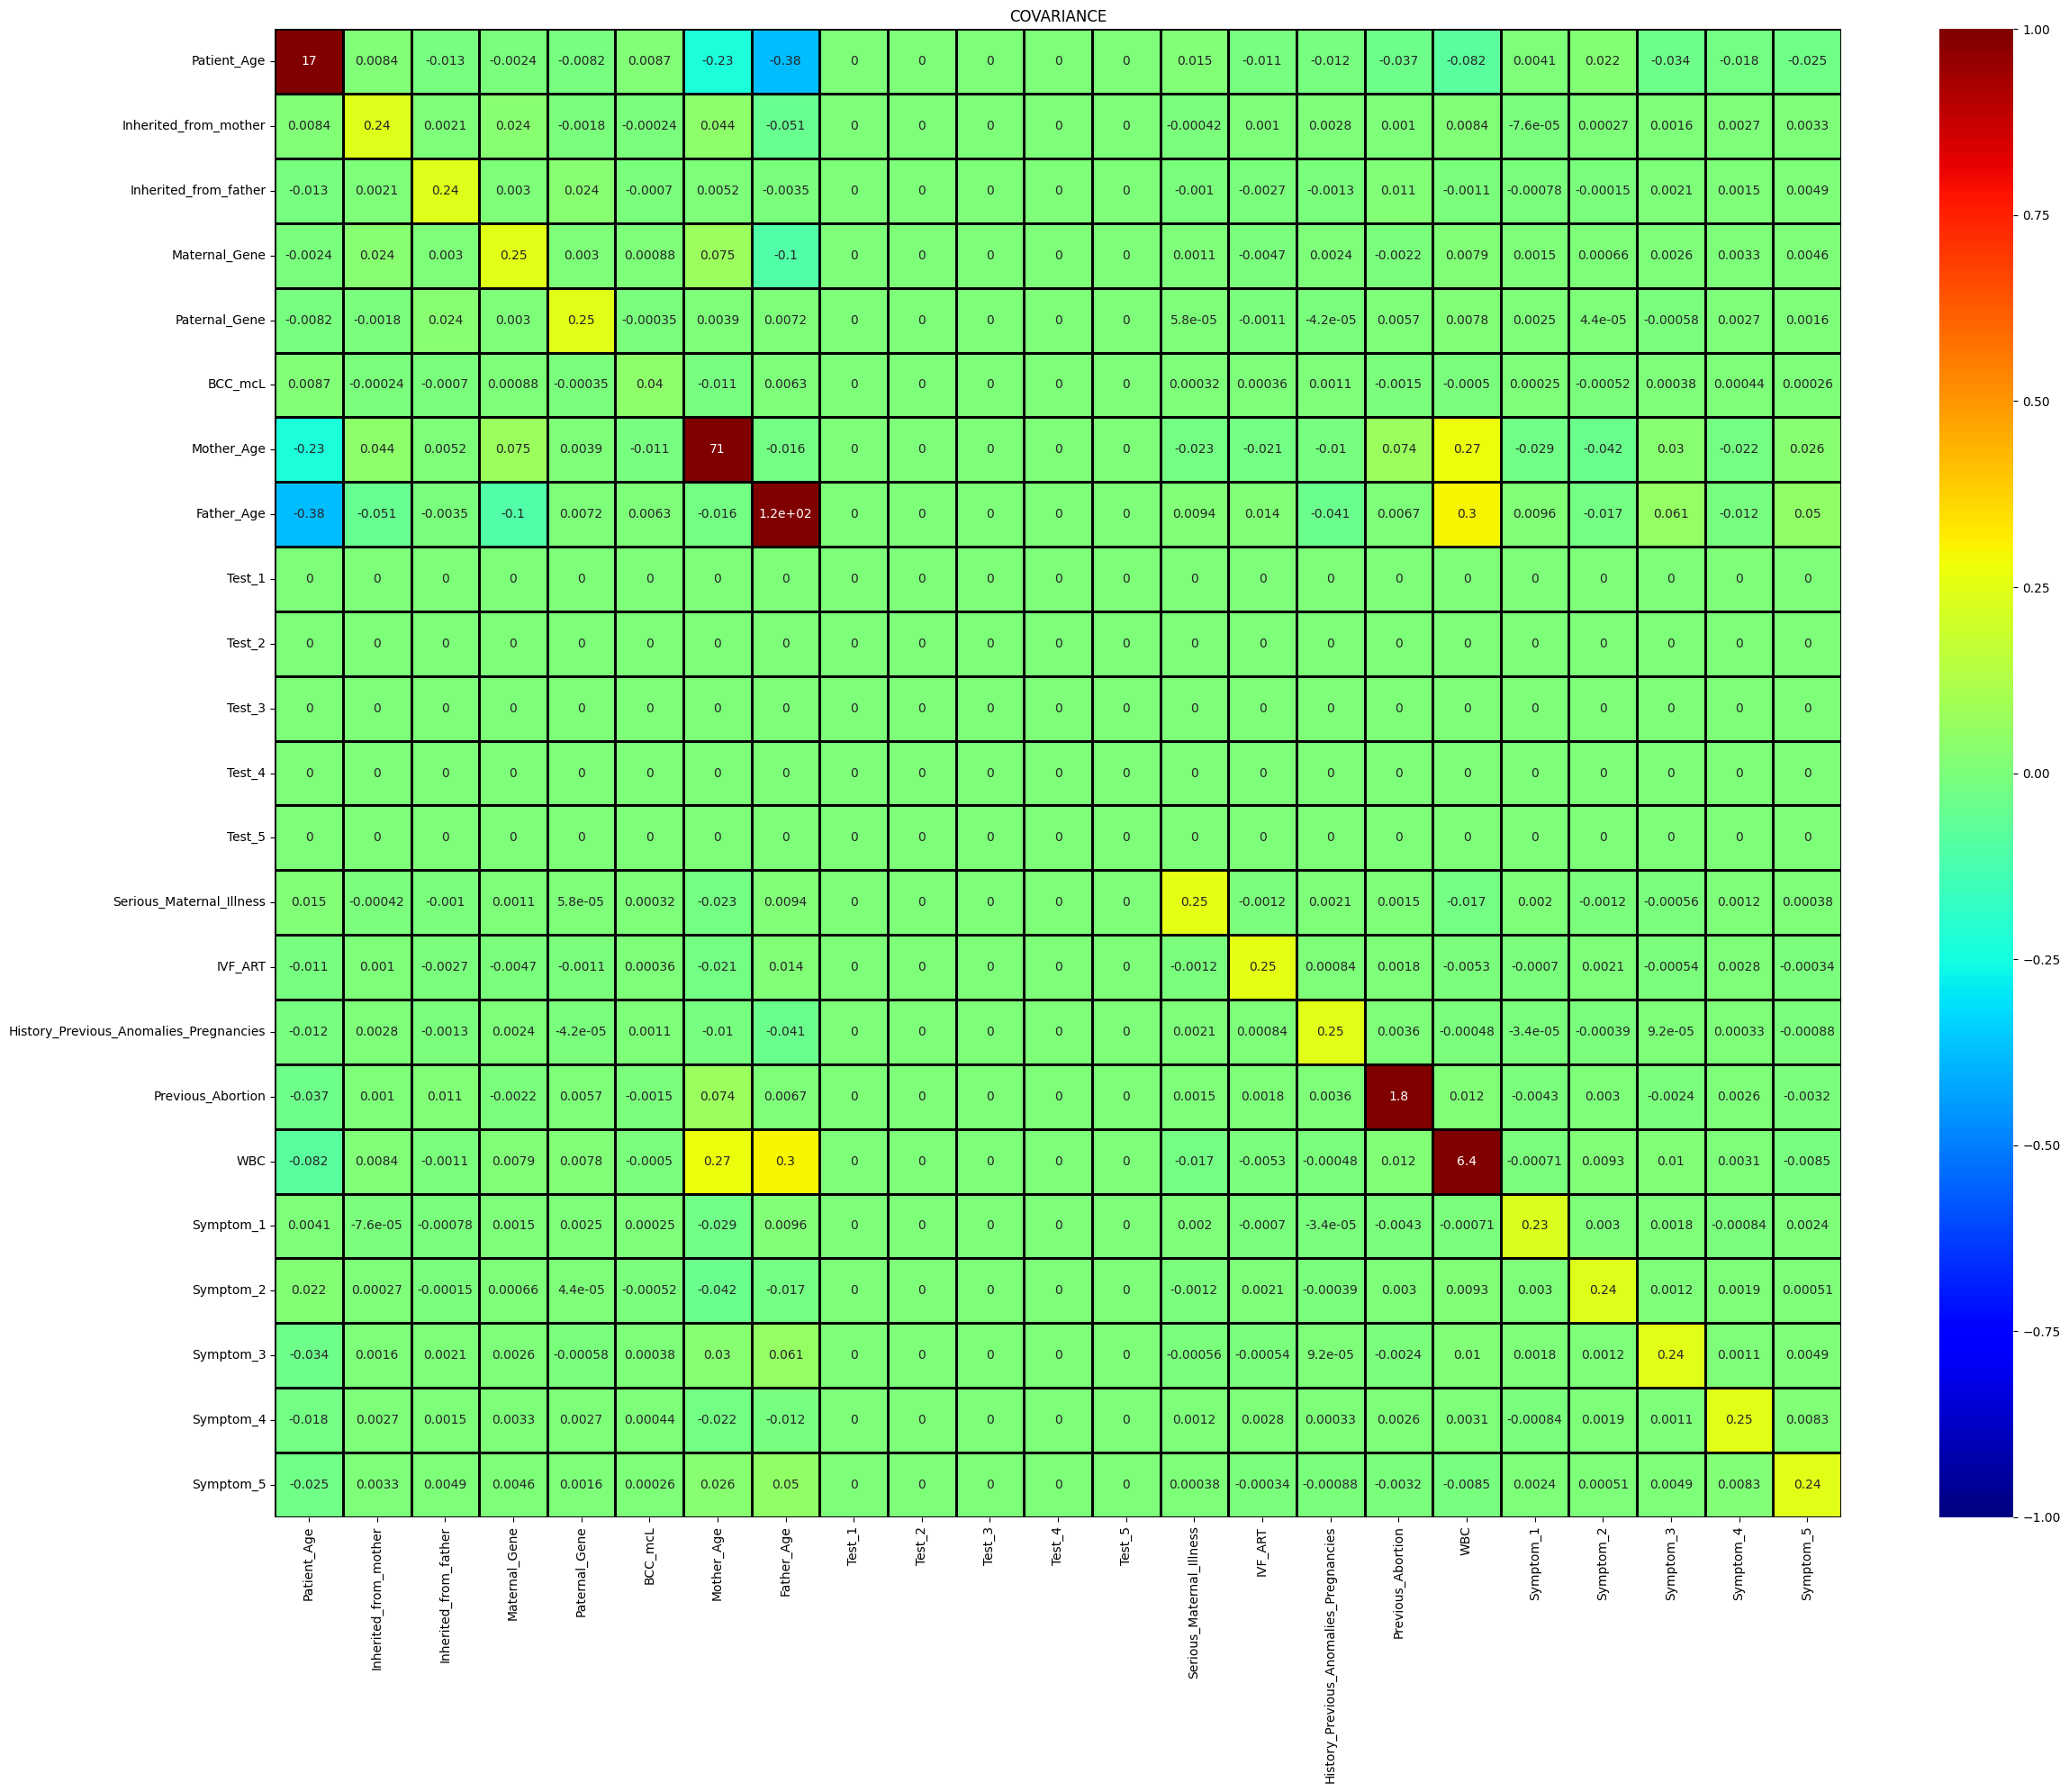

In [374]:
figure = plt.figure(figsize=(25,20))

sns.heatmap(Cov_Result,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="black",cmap="jet")
plt.title("COVARIANCE")
plt.tight_layout()
plt.show()

In [375]:
# View genetic disorders
print(train_numfill['Genetic_Disorder'].value_counts())
print(train_numfill['Disorder_Subclass'].value_counts())

disorders = train_numfill['Genetic_Disorder'].unique()
disorderSub = train_numfill['Disorder_Subclass'].unique()

print(len(disorders), disorders)
print(len(disorderSub), disorderSub)

Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: Genetic_Disorder, dtype: int64
Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder_Subclass, dtype: int64
4 ['Mitochondrial genetic inheritance disorders' nan
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
10 ["Leber's hereditary optic neuropathy" 'Cystic fibrosis' 'Diabetes'
 'Leigh syndrome' 'Cancer' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' nan "Alzheimer's"]


In [376]:
# View disorder / disorder subclass relationship
disorderSubclasses = train_numfill.groupby(['Genetic_Disorder','Disorder_Subclass']).size()
disorderSubclasses

Genetic_Disorder                              Disorder_Subclass                  
Mitochondrial genetic inheritance disorders   Leber's hereditary optic neuropathy     587
                                              Leigh syndrome                         4683
                                              Mitochondrial myopathy                 3971
Multifactorial genetic inheritance disorders  Alzheimer's                             133
                                              Cancer                                   91
                                              Diabetes                               1653
Single-gene inheritance diseases              Cystic fibrosis                        3145
                                              Hemochromatosis                        1228
                                              Tay-Sachs                              2556
dtype: int64

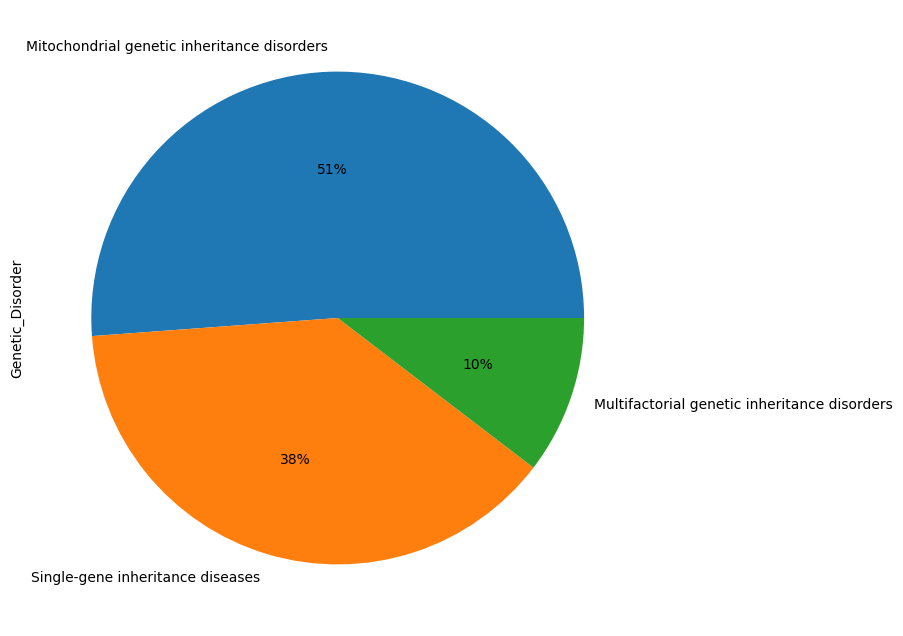

In [377]:
# Plot distribution of genetic disorders
figure = plt.figure(figsize=(20,8))
train_numfill['Genetic_Disorder'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

In [378]:
import seaborn as sns

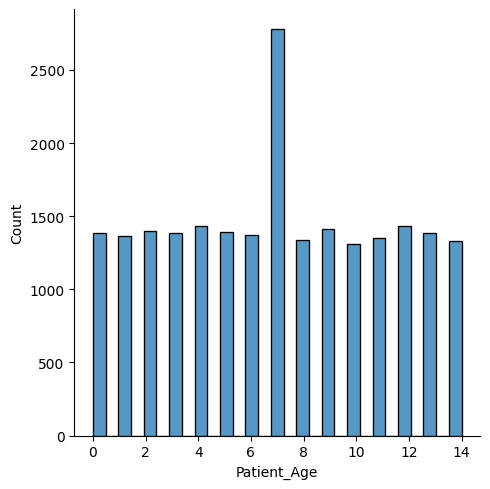

In [379]:
sns.displot(x = 'Patient_Age', data = train_numfill);

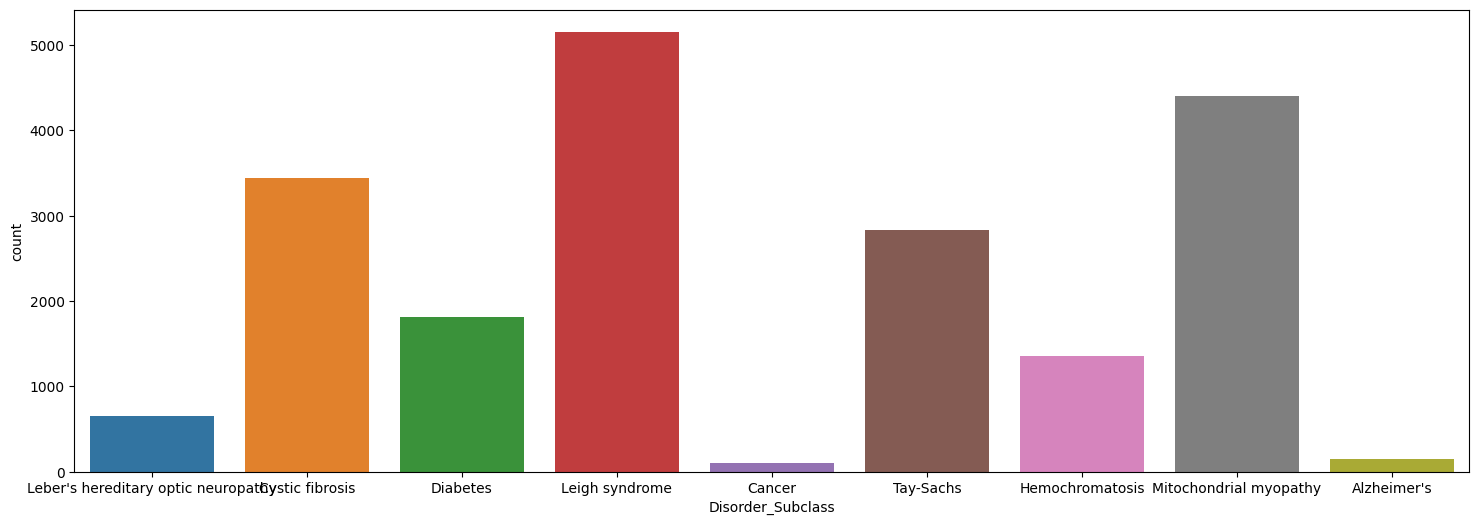

In [380]:
plt.figure(figsize=(18, 6))
sns.countplot(x = 'Disorder_Subclass', data = train_numfill);

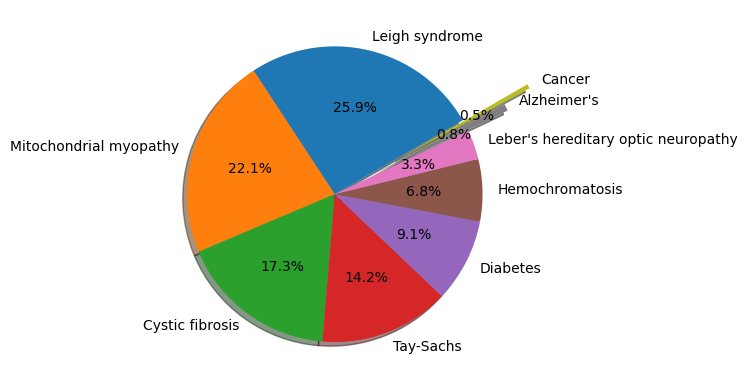

In [381]:
#visualizing in Pie chart
labels2 = 'Leigh syndrome', 'Mitochondrial myopathy', 'Cystic fibrosis', 'Tay-Sachs', 'Diabetes', 'Hemochromatosis', "Leber's hereditary optic neuropathy", "Alzheimer's", 'Cancer'
explode2 = (0, 0, 0, 0, 0, 0, 0, 0.3, 0.5)

plt.pie(train_numfill.Disorder_Subclass.value_counts(), explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=30);

<ipython-input-382-4fd54c241180>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_numfill_corr = train_numfill.corr()


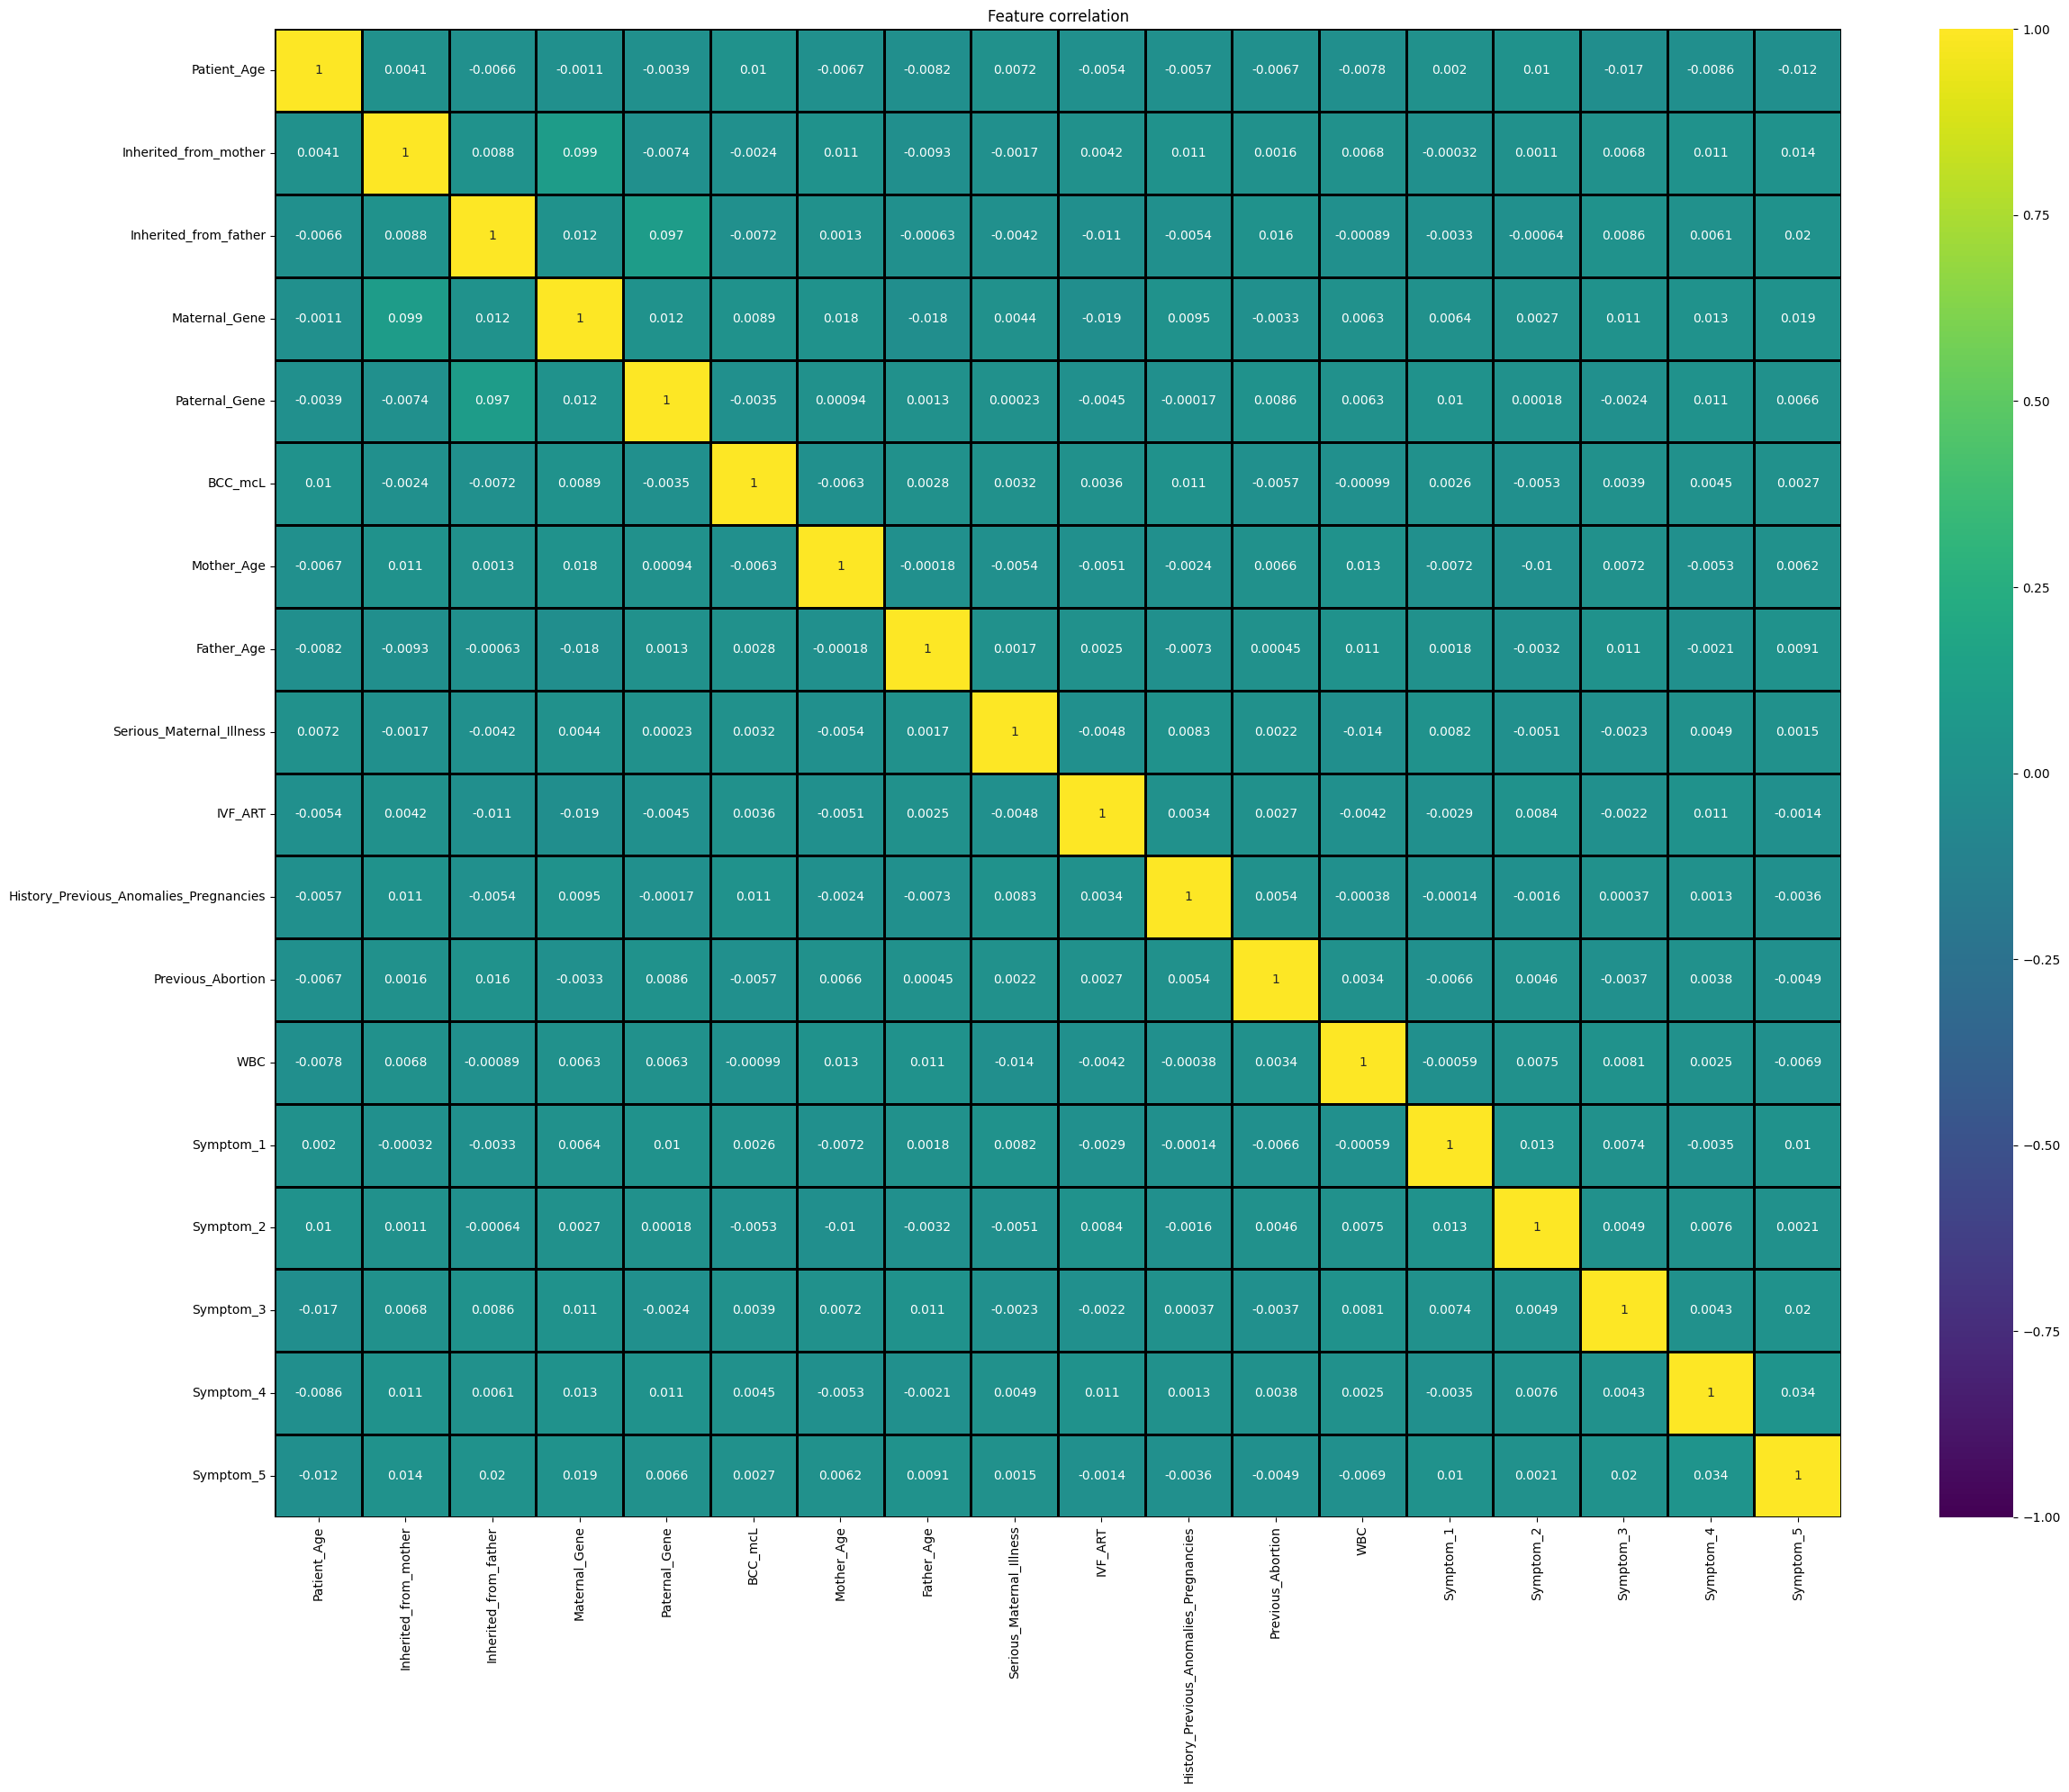

In [382]:
# Calculate correlations
train_numfill.drop(['Test_1','Test_2','Test_3','Test_4','Test_5'], axis=1, inplace=True )
train_numfill_corr = train_numfill.corr()
#Plot
figure = plt.figure(figsize=(25,20))
sns.heatmap(train_numfill_corr,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="black",cmap="viridis")
plt.title("Feature correlation")
plt.tight_layout()

plt.show()

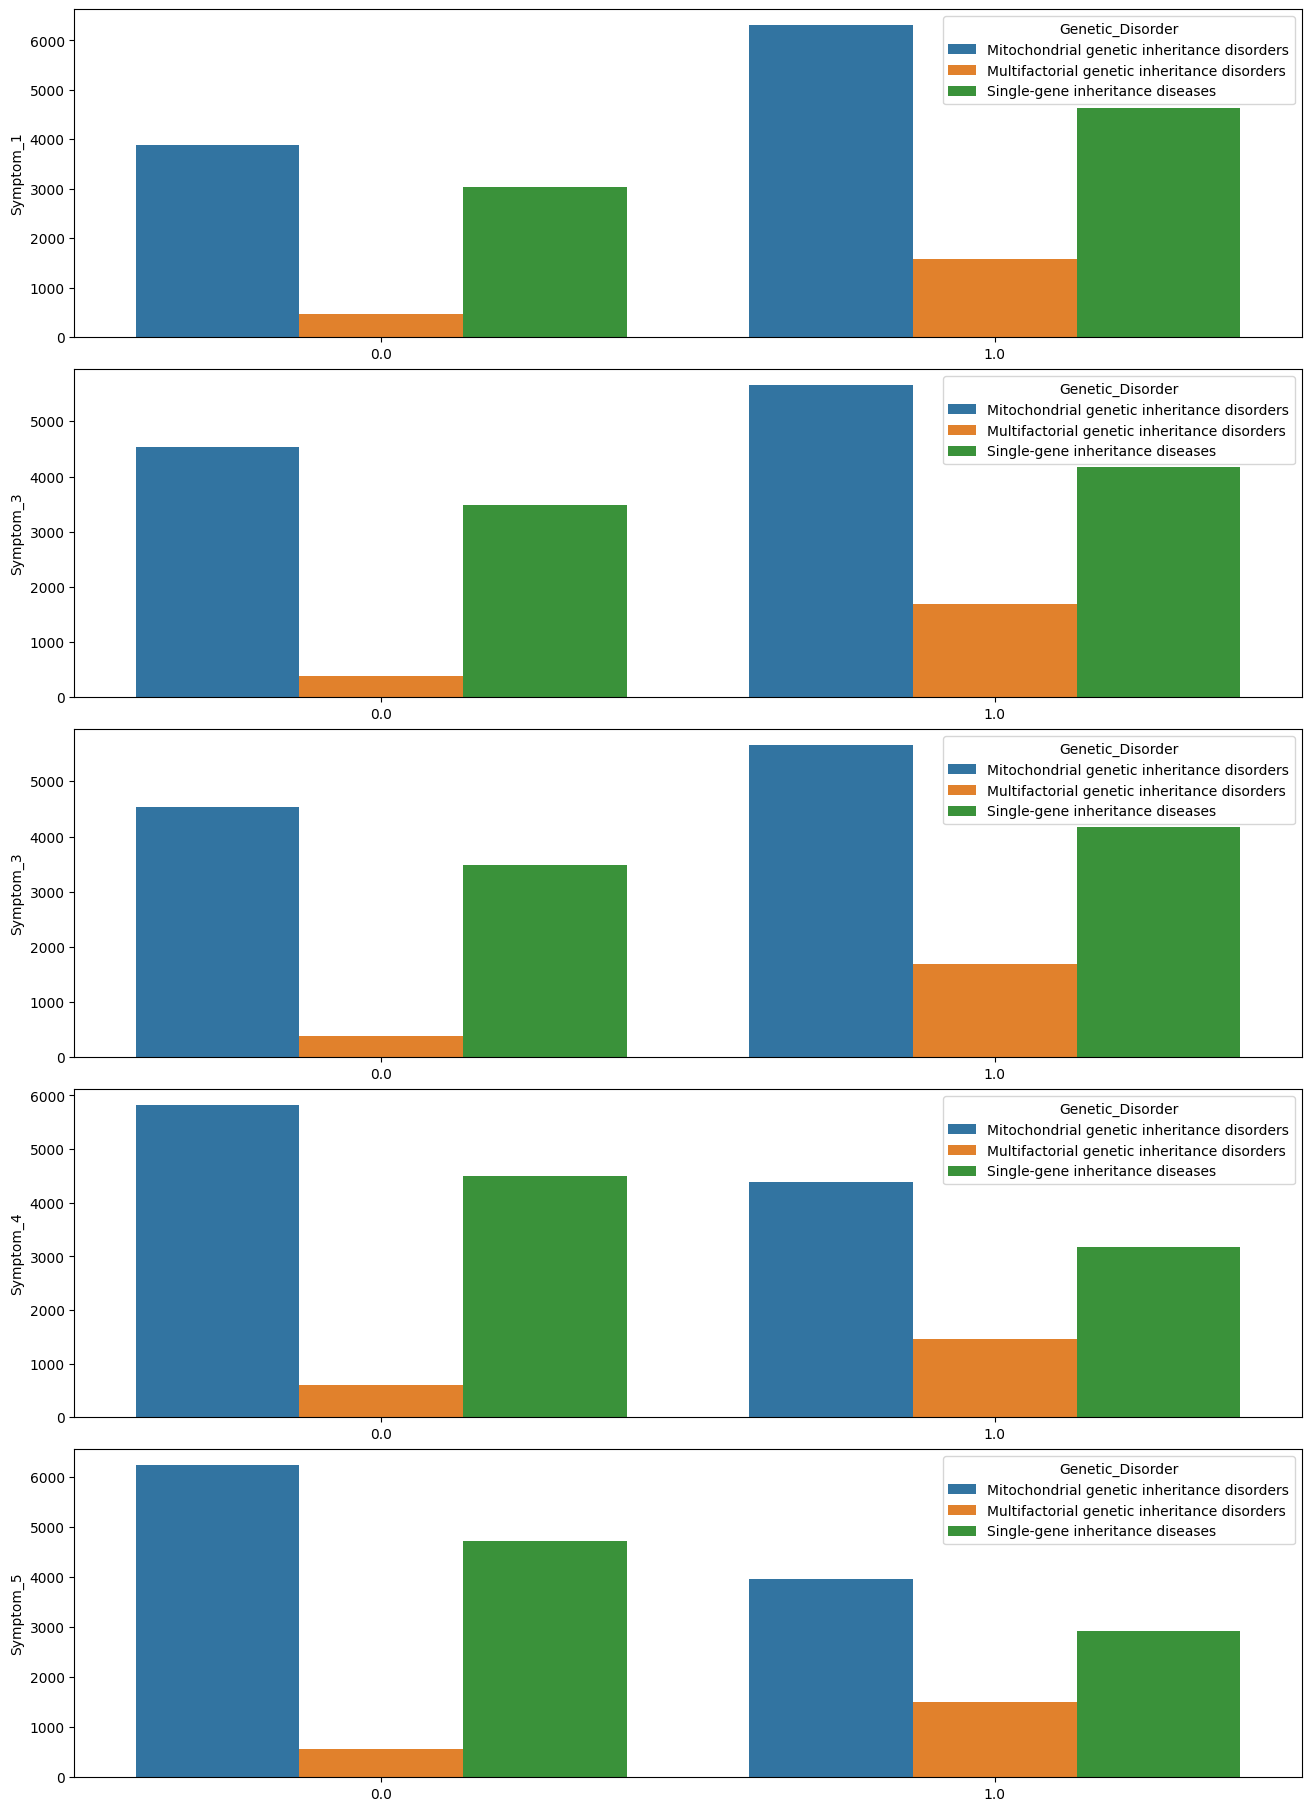

In [383]:
symptom  = ['Symptom_1', 'Symptom_3', 'Symptom_3', 'Symptom_4', 'Symptom_5']

fig, ax = plt.subplots(len(symptom),  figsize = (13, 18), constrained_layout = True)

for i, var in enumerate(symptom):
    sns.countplot(data = train_numfill, x = var, hue = 'Genetic_Disorder', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

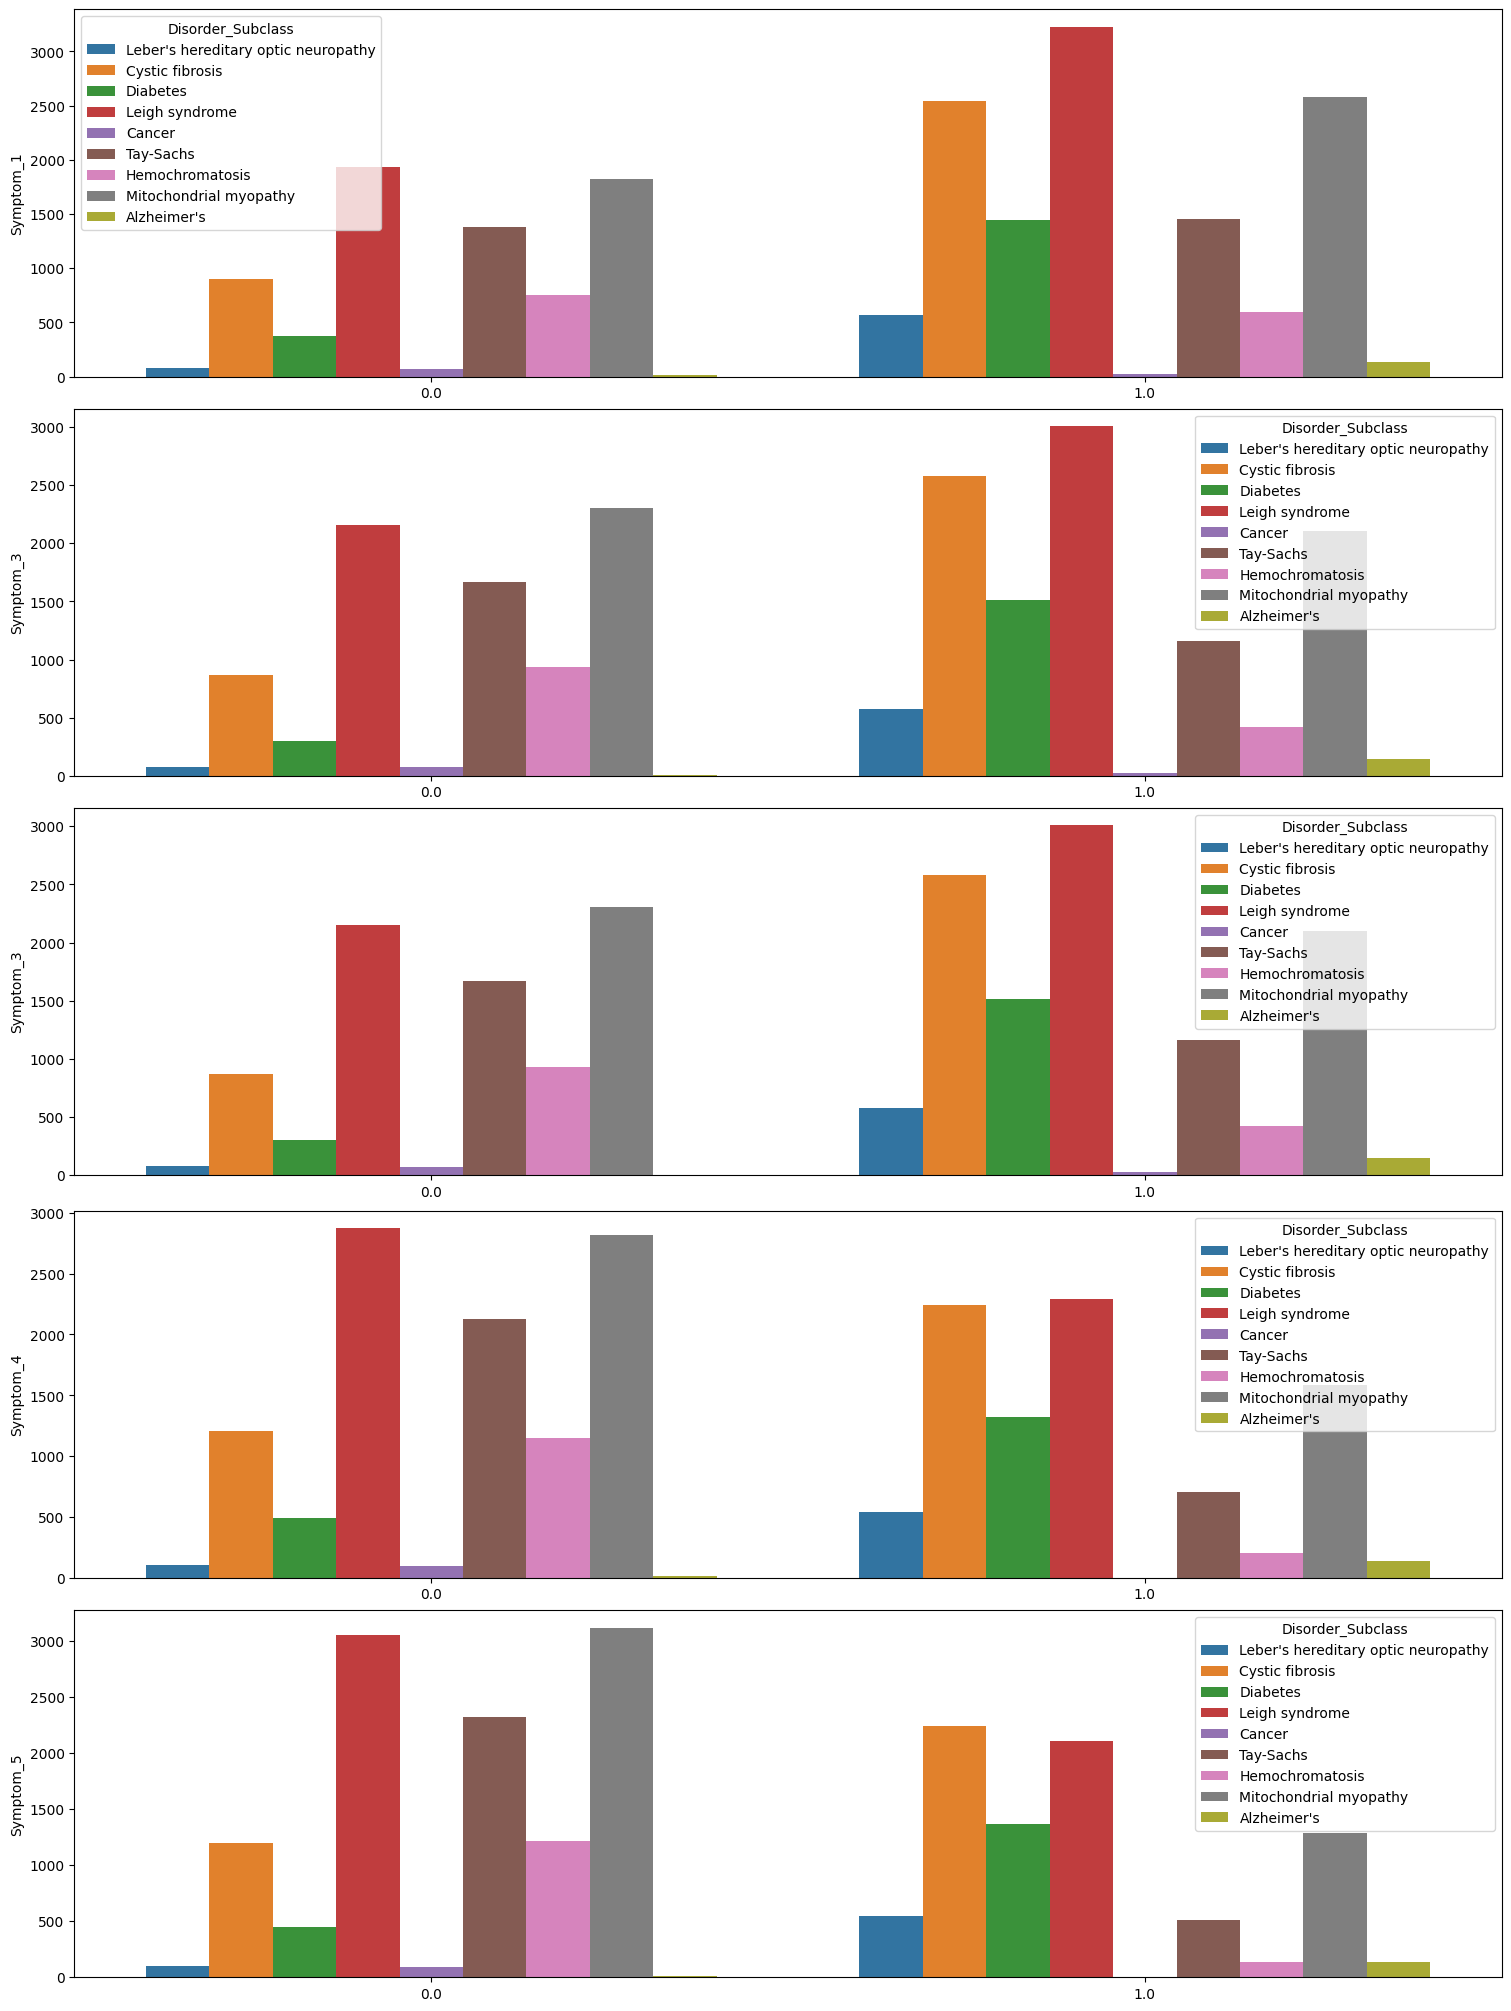

In [384]:
symptom  = ['Symptom_1', 'Symptom_3', 'Symptom_3', 'Symptom_4', 'Symptom_5']

fig, ax = plt.subplots(len(symptom),  figsize = (15, 20), constrained_layout = True)

for i, var in enumerate(symptom):
    sns.countplot(data = train_numfill, x = var, hue = 'Disorder_Subclass', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

In [385]:
# One-hot encode disorders to look for correlations between disorder and data
train_numfill['Disorder+Subclass'] = train['Genetic_Disorder'] + ' - ' + train['Disorder_Subclass']
onehot = pd.get_dummies(train_numfill['Disorder+Subclass'])
train_numfill.drop(['Genetic_Disorder', 'Disorder_Subclass','Disorder+Subclass'], axis=1, inplace=True)
train_numfill = train_numfill.join(onehot)
train_numfill.head()

,Patient_Id,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Patient_First_Name,Family_Name,Father_Name,...,Symptom_5,Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs
0,PID0x6418,2.0,1,0.0,1.0,0,4.760603,Richard,NaN,Larre,...,1.0,1,0,0,0,0,0,0,0,0
1,PID0x25d5,4.0,1,1.0,0.0,0,4.910669,Mike,NaN,Brycen,...,0.0,0,0,0,0,0,0,0,0,0
2,PID0x4a82,6.0,1,0.0,0.0,0,4.893297,Kimberly,NaN,Nashon,...,1.0,0,0,0,0,0,1,0,0,0
3,PID0x4ac8,12.0,1,0.0,1.0,0,4.705280,Jeffery,Hoelscher,Aayaan,...,0.0,0,1,0,0,0,0,0,0,0
4,PID0x1bf7,11.0,1,0.0,NaN,1,4.720703,Johanna,Stutzman,Suave,...,0.0,0,0,0,0,1,0,0,0,0


In [386]:
train_numfill.head()

,Patient_Id,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Patient_First_Name,Family_Name,Father_Name,...,Symptom_5,Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs
0,PID0x6418,2.0,1,0.0,1.0,0,4.760603,Richard,NaN,Larre,...,1.0,1,0,0,0,0,0,0,0,0
1,PID0x25d5,4.0,1,1.0,0.0,0,4.910669,Mike,NaN,Brycen,...,0.0,0,0,0,0,0,0,0,0,0
2,PID0x4a82,6.0,1,0.0,0.0,0,4.893297,Kimberly,NaN,Nashon,...,1.0,0,0,0,0,0,1,0,0,0
3,PID0x4ac8,12.0,1,0.0,1.0,0,4.705280,Jeffery,Hoelscher,Aayaan,...,0.0,0,1,0,0,0,0,0,0,0
4,PID0x1bf7,11.0,1,0.0,NaN,1,4.720703,Johanna,Stutzman,Suave,...,0.0,0,0,0,0,1,0,0,0,0


In [387]:
# Calculate correlations
train_numfill_corr = train_numfill.corr()

<ipython-input-387-9915425869bc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_numfill_corr = train_numfill.corr()


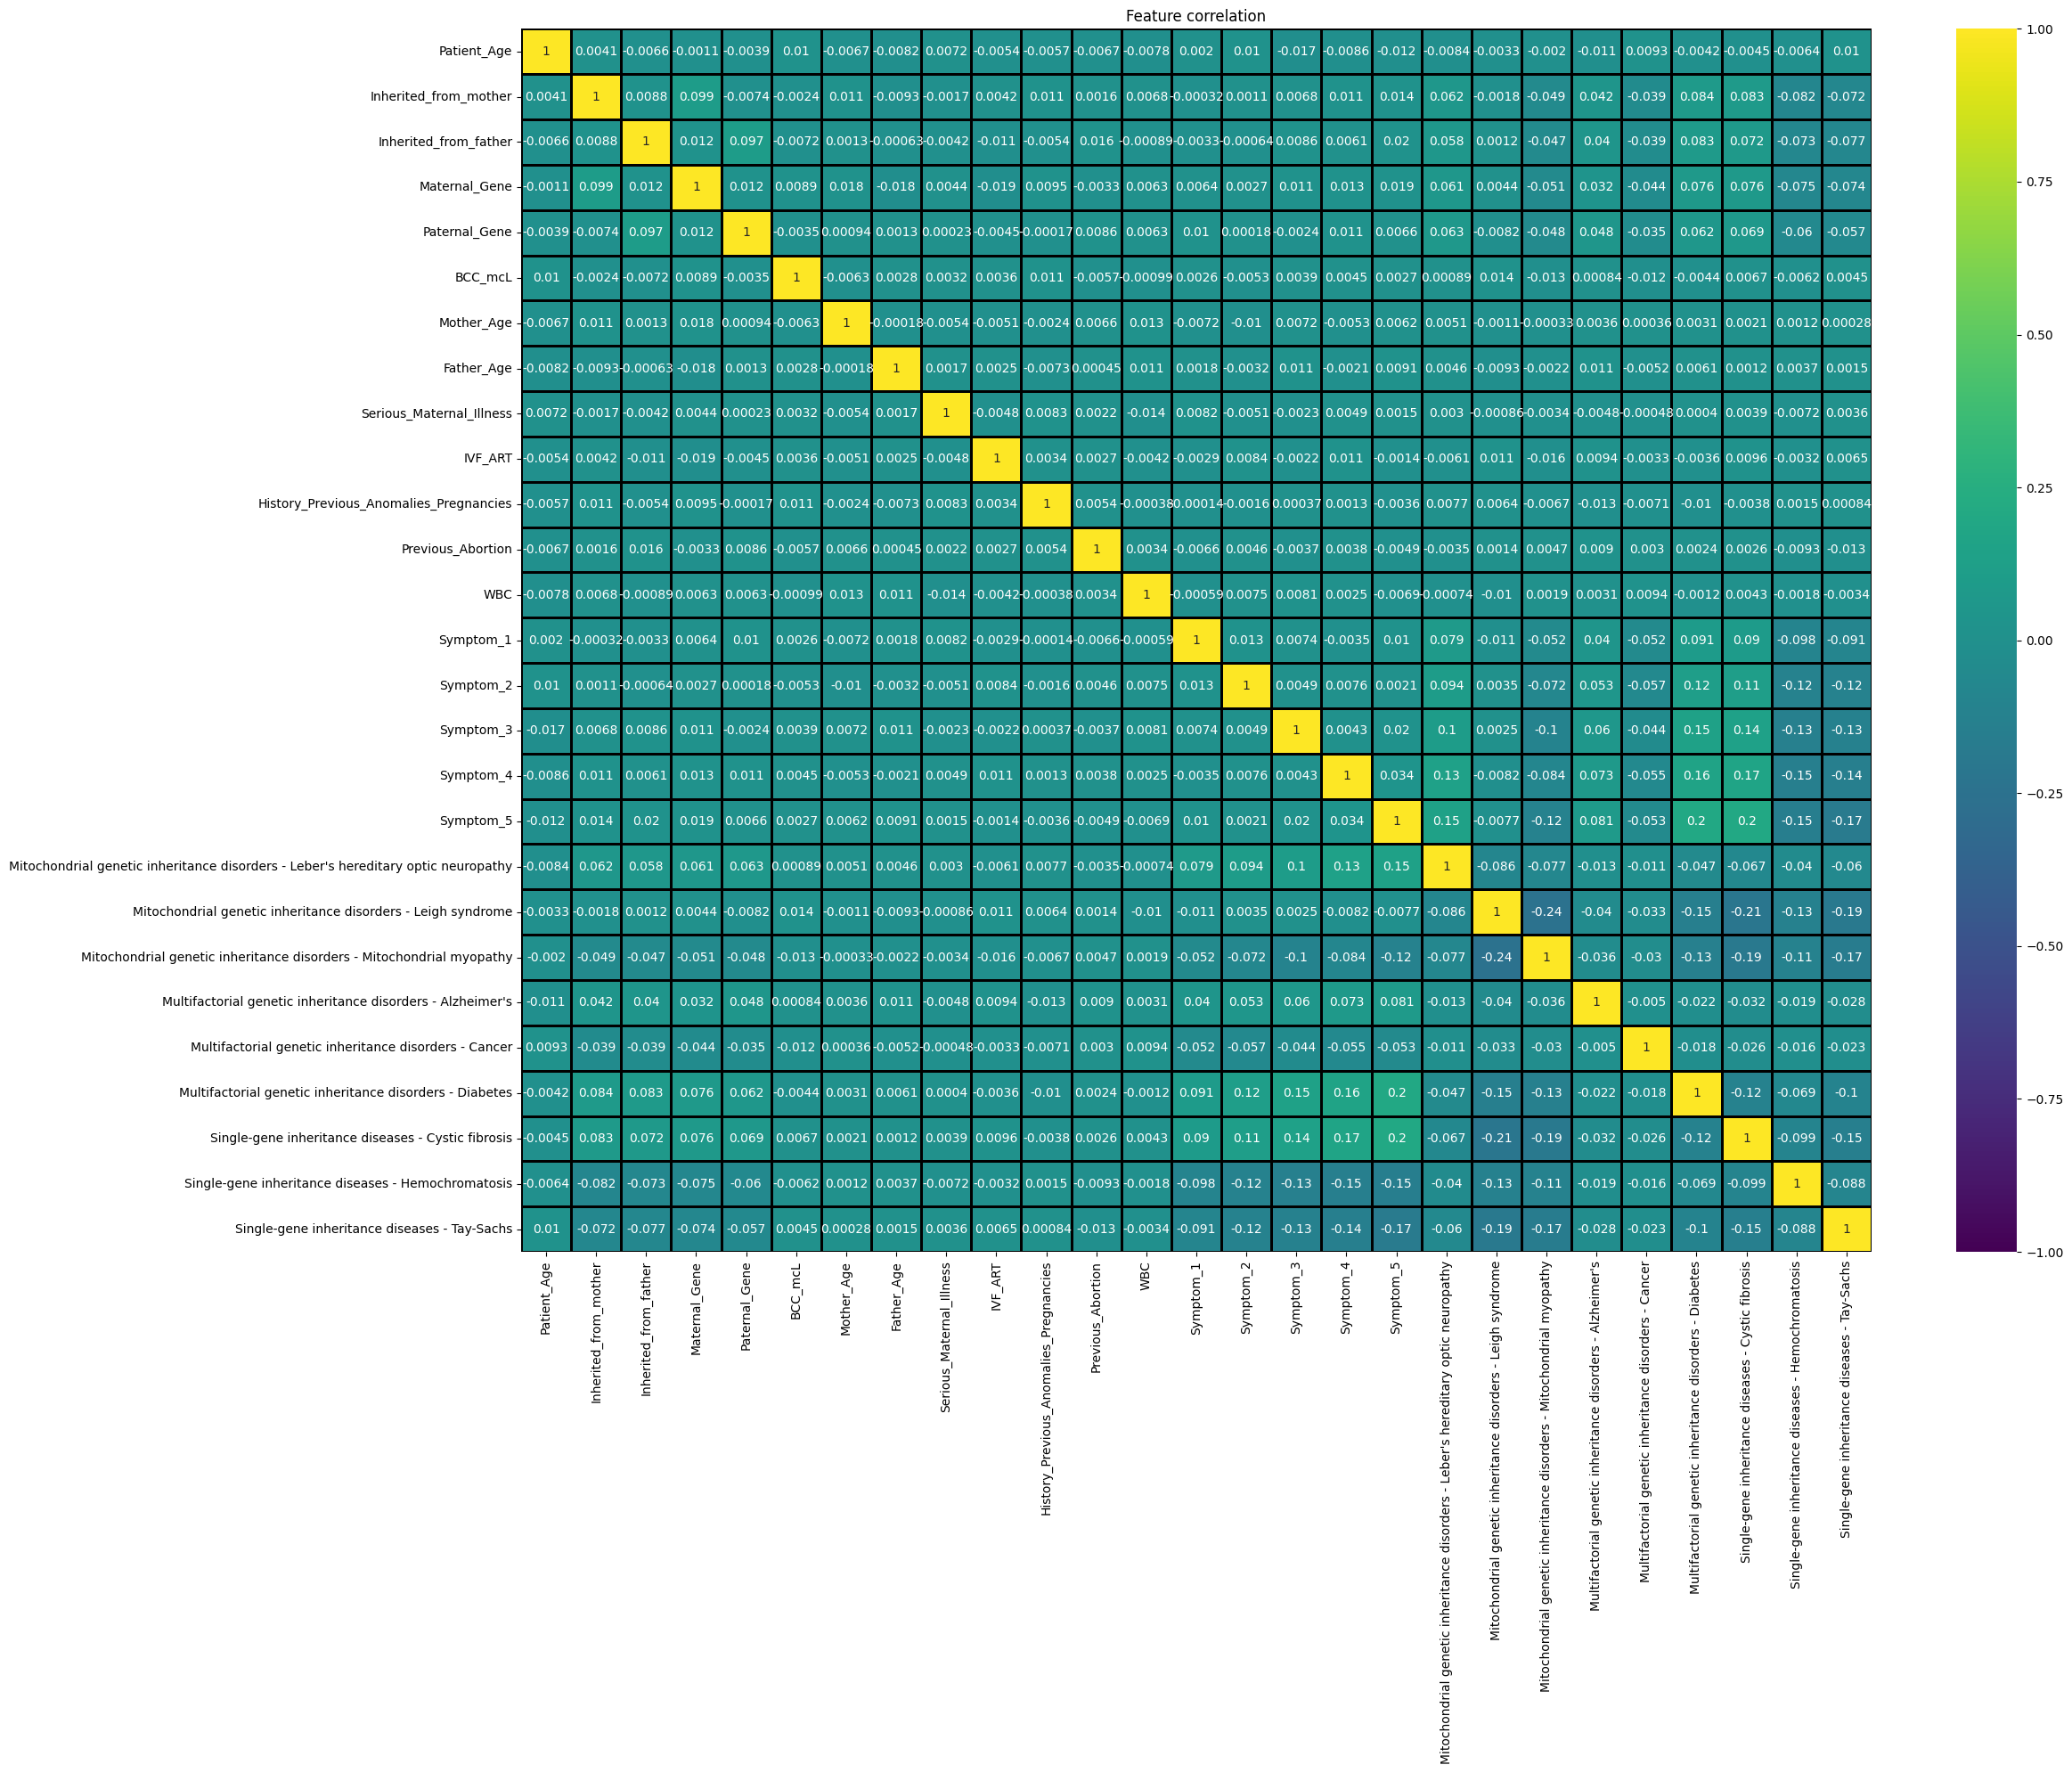

In [388]:
# Plot correlation heatmap with one-hot encoded disorders
figure = plt.figure(figsize=(25,20))
sns.heatmap(train_numfill_corr,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="black",cmap="viridis")
plt.title("Feature correlation")
plt.tight_layout()
plt.show()

## Skew & Outlier Detection

In [389]:
columns_to_drop = [
    "Patient_Id",
    "Patient_First_Name",
    "Family_Name",
    "Father_Name",
    "Institute_Name",
    "Location_of_Institute","Parental_Consent", "Place_Birth",
]

train_2 = train_numfill.drop(columns=columns_to_drop)
train_2.head()

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Status,Resp_Rate_BreathsPerMin,...,Symptom_5,Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs
0,2.0,1,0.0,1.0,0,4.760603,35.0,42.0,Alive,Normal (30-60),...,1.0,1,0,0,0,0,0,0,0,0
1,4.0,1,1.0,0.0,0,4.910669,35.0,23.0,Deceased,Tachypnea,...,0.0,0,0,0,0,0,0,0,0,0
2,6.0,1,0.0,0.0,0,4.893297,41.0,22.0,Alive,Normal (30-60),...,1.0,0,0,0,0,0,1,0,0,0
3,12.0,1,0.0,1.0,0,4.705280,21.0,42.0,Deceased,Tachypnea,...,0.0,0,1,0,0,0,0,0,0,0
4,11.0,1,0.0,NaN,1,4.720703,32.0,42.0,Alive,Tachypnea,...,0.0,0,0,0,0,1,0,0,0,0


In [390]:
genetic_disorder_columns = [
    "Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy",
    "Mitochondrial genetic inheritance disorders - Leigh syndrome",
    "Mitochondrial genetic inheritance disorders - Mitochondrial myopathy",
    "Multifactorial genetic inheritance disorders - Alzheimer's",
    "Multifactorial genetic inheritance disorders - Cancer",
    "Multifactorial genetic inheritance disorders - Diabetes",
    "Single-gene inheritance diseases - Cystic fibrosis",
    "Single-gene inheritance diseases - Hemochromatosis",
    "Single-gene inheritance diseases - Tay-Sachs",
]

# Create the new "Genetic_Disorder" column
train_2['Genetic_Disorder'] = train_2[genetic_disorder_columns].any(axis=1).astype(int)
train_2.head()

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Status,Resp_Rate_BreathsPerMin,...,Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs,Genetic_Disorder
0,2.0,1,0.0,1.0,0,4.760603,35.0,42.0,Alive,Normal (30-60),...,1,0,0,0,0,0,0,0,0,1
1,4.0,1,1.0,0.0,0,4.910669,35.0,23.0,Deceased,Tachypnea,...,0,0,0,0,0,0,0,0,0,0
2,6.0,1,0.0,0.0,0,4.893297,41.0,22.0,Alive,Normal (30-60),...,0,0,0,0,0,1,0,0,0,1
3,12.0,1,0.0,1.0,0,4.705280,21.0,42.0,Deceased,Tachypnea,...,0,1,0,0,0,0,0,0,0,1
4,11.0,1,0.0,NaN,1,4.720703,32.0,42.0,Alive,Tachypnea,...,0,0,0,0,1,0,0,0,0,1


In [391]:
def skew_and_outlier_test(df, skew_threshold=1.0, zscore_threshold=3.0):
    # Identify numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

    # Convert numeric columns to numeric type
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    skewed_columns = []

    # Identify skewed columns
    for column in numeric_columns:
        # Skewness test
        column_skewness = skew(df[column].dropna(), nan_policy='omit')
        if abs(column_skewness) > skew_threshold:
            skewed_columns.append(column)

            # Outlier test using Z-score
            column_data = df[column].dropna()
            if len(column_data) > 0:
                z_scores = zscore(column_data)
                outlier_count = np.sum(abs(z_scores) > zscore_threshold)
                print(f"Column '{column}': Number of outliers - {outlier_count}")

    # Determine the number of rows and columns for subplots
    num_skewed_columns = len(skewed_columns)
    num_rows = (num_skewed_columns // 3) + (1 if num_skewed_columns % 3 > 0 else 0)
    num_cols = min(3, num_skewed_columns)

    # Plot all skewed columns in a grid
    if skewed_columns:
        plt.figure(figsize=(12, 4 * num_rows))
        for i, column in enumerate(skewed_columns, 1):
            plt.subplot(num_rows, num_cols, i)
            df[column].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7)
            plt.title(f'Binary Column: {column}')
            plt.xlabel('Values')
            plt.ylabel('Frequency')

            # Print column name and skew value on the plot
            column_skewness = skew(df[column].dropna(), nan_policy='omit')
            plt.text(0.95, 0.95, f'{column}\nSkew: {column_skewness:.2f}', transform=plt.gca().transAxes,
                     fontsize=8, verticalalignment='top', horizontalalignment='right')

            # Print skew value separately
            print(f"Column '{column}': Skew - {column_skewness}")

        # Adjust layout and show the plot
        plt.tight_layout()
        plt.show()

    return skewed_columns


Column 'Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy': Number of outliers - 587
Column 'Mitochondrial genetic inheritance disorders - Leigh syndrome': Number of outliers - 0
Column 'Mitochondrial genetic inheritance disorders - Mitochondrial myopathy': Number of outliers - 0
Column 'Multifactorial genetic inheritance disorders - Alzheimer's': Number of outliers - 133
Column 'Multifactorial genetic inheritance disorders - Cancer': Number of outliers - 91
Column 'Multifactorial genetic inheritance disorders - Diabetes': Number of outliers - 1653
Column 'Single-gene inheritance diseases - Cystic fibrosis': Number of outliers - 0
Column 'Single-gene inheritance diseases - Hemochromatosis': Number of outliers - 1228
Column 'Single-gene inheritance diseases - Tay-Sachs': Number of outliers - 0
Column 'Genetic_Disorder': Number of outliers - 0
Column 'Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy': Skew - 5.8862050270679

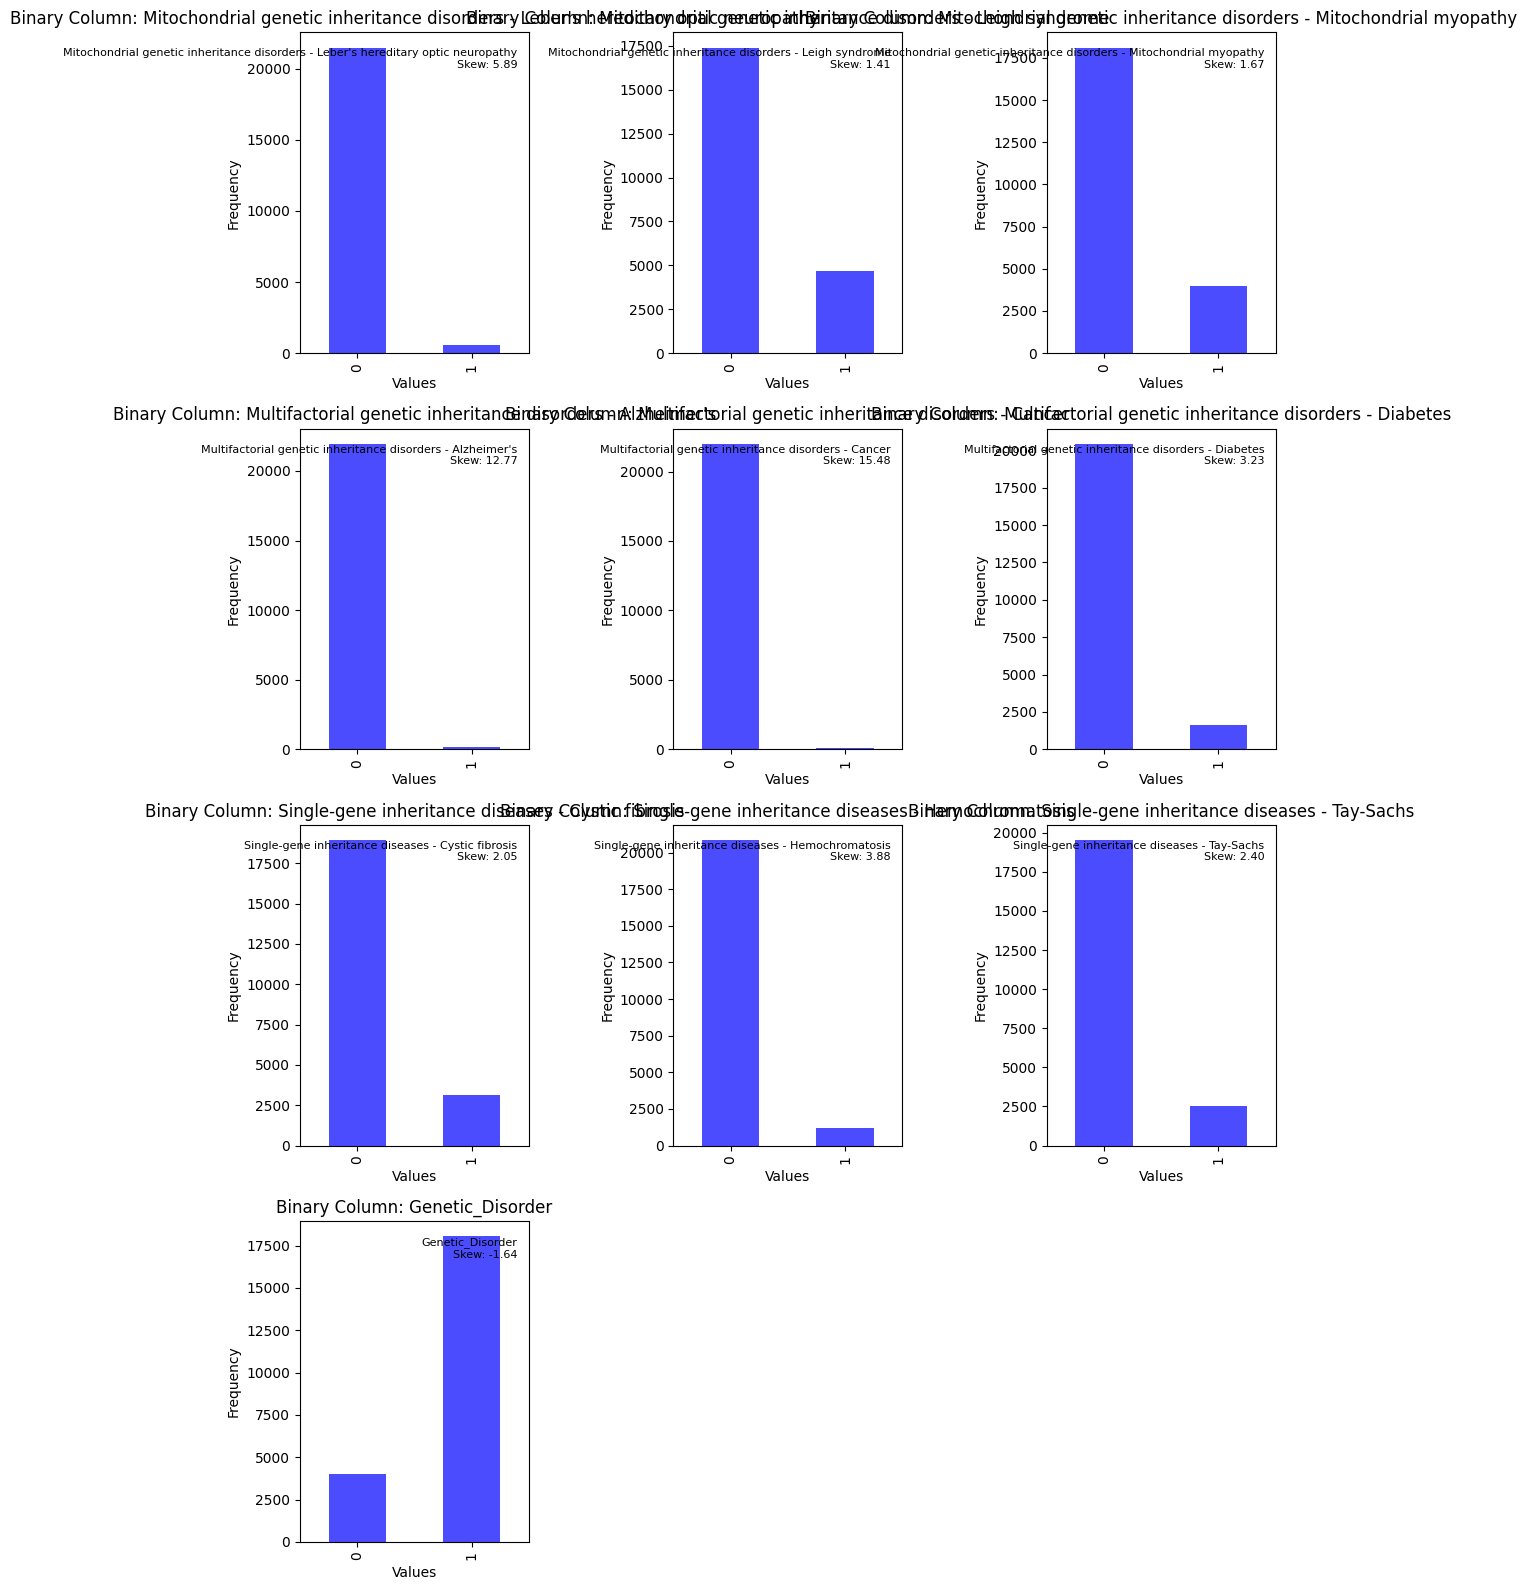

Skewed Columns in 'train_2': ["Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy", 'Mitochondrial genetic inheritance disorders - Leigh syndrome', 'Mitochondrial genetic inheritance disorders - Mitochondrial myopathy', "Multifactorial genetic inheritance disorders - Alzheimer's", 'Multifactorial genetic inheritance disorders - Cancer', 'Multifactorial genetic inheritance disorders - Diabetes', 'Single-gene inheritance diseases - Cystic fibrosis', 'Single-gene inheritance diseases - Hemochromatosis', 'Single-gene inheritance diseases - Tay-Sachs', 'Genetic_Disorder']


In [392]:
skewed_columns_train = skew_and_outlier_test(train_2)

print("Skewed Columns in 'train_2':", skewed_columns_train)

We have a ton of outliers and skewed columns. Most of these are class imbalances in our disease subgroups. ALso note to self rename these columns so they read better

## Dummies for Cat Columms

In [393]:
train_2.head(5)

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Status,Resp_Rate_BreathsPerMin,...,Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs,Genetic_Disorder
0,2.0,1,0.0,1.0,0,4.760603,35.0,42.0,Alive,Normal (30-60),...,1,0,0,0,0,0,0,0,0,1
1,4.0,1,1.0,0.0,0,4.910669,35.0,23.0,Deceased,Tachypnea,...,0,0,0,0,0,0,0,0,0,0
2,6.0,1,0.0,0.0,0,4.893297,41.0,22.0,Alive,Normal (30-60),...,0,0,0,0,0,1,0,0,0,1
3,12.0,1,0.0,1.0,0,4.705280,21.0,42.0,Deceased,Tachypnea,...,0,1,0,0,0,0,0,0,0,1
4,11.0,1,0.0,NaN,1,4.720703,32.0,42.0,Alive,Tachypnea,...,0,0,0,0,1,0,0,0,0,1


In [394]:
print(train_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 40 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Patient_Age                                                                        22083 non-null  float64
 1   Inherited_from_mother                                                              22083 non-null  int64  
 2   Inherited_from_father                                                              21777 non-null  float64
 3   Maternal_Gene                                                                      19273 non-null  float64
 4   Paternal_Gene                                                                      22083 non-null  int64  
 5   BCC_mcL                                                                            22083 non-null  flo

In [395]:
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(df, columns_to_encode):
    encode_func = LabelEncoder()
    for column in columns_to_encode:
        if df[column].dtype == 'object':  # Check if the column is categorical
            df[column] = encode_func.fit_transform(df[column].fillna('NaN'))
        else:
            df[column] = encode_func.fit_transform(df[column])
    return df.astype("float32")

# Example usage
columns_to_encode = [
    'Status', 'Resp_Rate_BreathsPerMin', 'Heart_Rate_RatesPerMin', 'Follow_Up',
    'Gender', 'Birth_Asphyxia', 'Autopsy_BD', 'Folic_Acid_Details', 'Radiation_Exposure',
    'Substance_Abuse', 'Birth_Defects', 'Blood_Test', 'Maternal_Gene', 'Inherited_from_father',
    'Serious_Maternal_Illness', 'IVF_ART', 'History_Previous_Anomalies_Pregnancies'
]

Encode_Data = label_encode_columns(train_2, columns_to_encode)


In [396]:
Encode_Data.head()

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Status,Resp_Rate_BreathsPerMin,...,Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs,Genetic_Disorder
0,2.0,1.0,0.0,1.0,0.0,4.760603,35.0,42.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.0,1.0,1.0,0.0,0.0,4.910669,35.0,23.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,41.0,22.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,12.0,1.0,0.0,1.0,0.0,4.705280,21.0,42.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11.0,1.0,0.0,2.0,1.0,4.720703,32.0,42.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [397]:
print(Encode_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 40 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Patient_Age                                                                        22083 non-null  float32
 1   Inherited_from_mother                                                              22083 non-null  float32
 2   Inherited_from_father                                                              22083 non-null  float32
 3   Maternal_Gene                                                                      22083 non-null  float32
 4   Paternal_Gene                                                                      22083 non-null  float32
 5   BCC_mcL                                                                            22083 non-null  flo

In [398]:
train_3 = Encode_Data.copy()

In [399]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVR
import math
import operator
from prettytable import PrettyTable
from sklearn.model_selection import cross_val_score, GridSearchCV


In [401]:
##Remove Target Variable - Genetic Disorder
X = train_3.iloc[:, 0:30]
y = train_3['Genetic_Disorder']

X.head()

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Status,Resp_Rate_BreathsPerMin,...,History_Previous_Anomalies_Pregnancies,Previous_Abortion,Birth_Defects,WBC,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
0,2.0,1.0,0.0,1.0,0.0,4.760603,35.0,42.0,0.0,1.0,...,1.0,2.0,1.0,9.857562,0.0,1.0,1.0,1.0,1.0,1.0
1,4.0,1.0,1.0,0.0,0.0,4.910669,35.0,23.0,1.0,2.0,...,1.0,2.0,0.0,5.522560,3.0,1.0,1.0,1.0,1.0,0.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,41.0,22.0,0.0,1.0,...,1.0,4.0,2.0,7.477132,3.0,0.0,1.0,1.0,1.0,1.0
3,12.0,1.0,0.0,1.0,0.0,4.705280,21.0,42.0,1.0,2.0,...,1.0,1.0,2.0,7.919321,2.0,0.0,0.0,1.0,0.0,0.0
4,11.0,1.0,0.0,2.0,1.0,4.720703,32.0,42.0,0.0,2.0,...,0.0,4.0,0.0,4.098210,0.0,0.0,0.0,0.0,0.0,0.0


In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

In [403]:
X_train.head()

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Status,Resp_Rate_BreathsPerMin,...,History_Previous_Anomalies_Pregnancies,Previous_Abortion,Birth_Defects,WBC,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
9747,9.0,0.0,0.0,1.0,1.0,4.698997,33.0,42.0,1.0,2.0,...,1.0,3.0,2.0,5.280596,2.0,1.0,1.0,1.0,0.0,0.0
7084,6.0,0.0,1.0,0.0,0.0,4.764196,44.0,42.0,0.0,1.0,...,1.0,4.0,2.0,7.406277,3.0,1.0,0.0,1.0,1.0,0.0
21330,7.0,0.0,0.0,0.0,0.0,4.908837,32.0,55.0,0.0,2.0,...,0.0,1.0,2.0,6.199747,3.0,1.0,1.0,1.0,1.0,1.0
4272,7.0,0.0,0.0,0.0,0.0,4.624006,35.0,20.0,0.0,0.0,...,0.0,4.0,2.0,7.084611,4.0,1.0,1.0,0.0,0.0,0.0
7754,7.0,1.0,0.0,0.0,0.0,4.738833,35.0,42.0,1.0,0.0,...,2.0,1.0,1.0,5.890480,3.0,1.0,0.0,0.0,0.0,0.0


In [405]:
X_test.head()

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Status,Resp_Rate_BreathsPerMin,...,History_Previous_Anomalies_Pregnancies,Previous_Abortion,Birth_Defects,WBC,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
6893,5.0,1.0,0.0,1.0,1.0,4.951746,19.0,49.0,0.0,1.0,...,1.0,4.0,2.0,8.670223,2.0,1.0,0.0,0.0,0.0,1.0
5990,10.0,0.0,1.0,1.0,0.0,4.998570,25.0,41.0,0.0,2.0,...,1.0,4.0,0.0,9.235903,2.0,1.0,0.0,1.0,1.0,1.0
18456,2.0,1.0,0.0,0.0,0.0,4.683733,31.0,40.0,0.0,2.0,...,0.0,0.0,2.0,7.114050,1.0,1.0,0.0,0.0,0.0,1.0
11446,0.0,1.0,0.0,1.0,0.0,4.788130,50.0,42.0,1.0,1.0,...,0.0,2.0,2.0,5.700565,1.0,1.0,0.0,0.0,1.0,0.0
20195,0.0,1.0,0.0,2.0,1.0,4.961238,33.0,42.0,0.0,0.0,...,1.0,2.0,0.0,7.477132,3.0,1.0,1.0,1.0,1.0,1.0


In [406]:
from sklearn.preprocessing import StandardScaler
import random

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [407]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

def compute_metrics(actual, predicted):
    #tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
    confmat = confusion_matrix(actual, predicted)
    print("Accuracy: " + str(accuracy_score(actual, predicted)))
    print(classification_report(actual, predicted, zero_division=0))
    disp = ConfusionMatrixDisplay(confusion_matrix=confmat)
    disp.plot()

In [408]:
##ROC-AUC Function

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8188815938419742
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       799
         1.0       0.82      1.00      0.90      3618

    accuracy                           0.82      4417
   macro avg       0.41      0.50      0.45      4417
weighted avg       0.67      0.82      0.74      4417



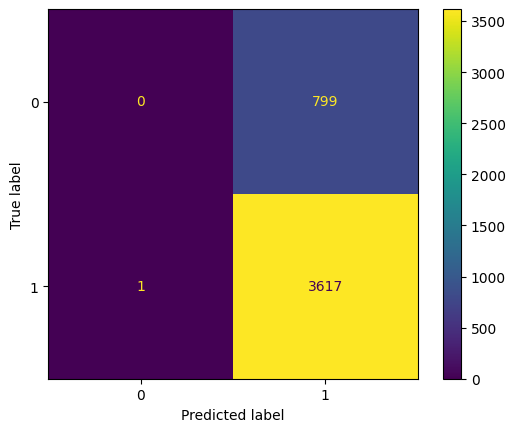

In [409]:
from sklearn.linear_model import LogisticRegression

random.seed(1234)
logRegression = LogisticRegression()
logRegression.fit(X_train ,y_train)
compute_metrics(y_test, logRegression.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.81607244 0.81686952 0.81630342 0.81658647 0.81686952]
Mean CV accuracy: 0.8165402732839422


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best hyperparameters: {'C': 0.001}
Accuracy: 0.8191079918496718
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       799
         1.0       0.82      1.00      0.90      3618

    accuracy                           0.82      4417
   macro avg       0.41      0.50      0.45      4417
weighted avg       0.67      0.82      0.74      4417



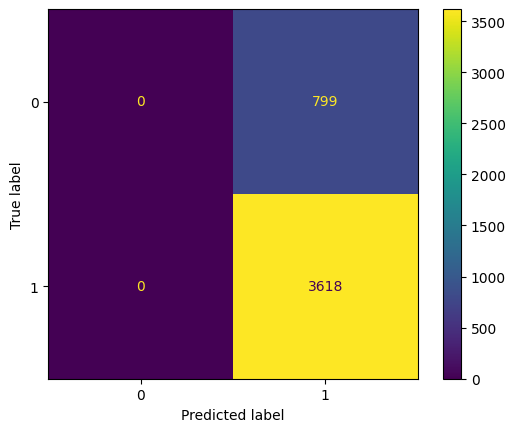

In [410]:
##Logreg addCV and Tune
random.seed(1234)
logRegression = LogisticRegression()

# Cross Validation
cv_scores = cross_val_score(logRegression, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Hyperparameter Tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(logRegression, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Tuned Model
tuned_logRegression = grid_search.best_estimator_
y_pred = tuned_logRegression.predict(X_test)

# Compute metrics
compute_metrics(y_test, y_pred)


Accuracy: 0.716323296354992
              precision    recall  f1-score   support

         0.0       0.24      0.27      0.26       799
         1.0       0.84      0.81      0.82      3618

    accuracy                           0.72      4417
   macro avg       0.54      0.54      0.54      4417
weighted avg       0.73      0.72      0.72      4417



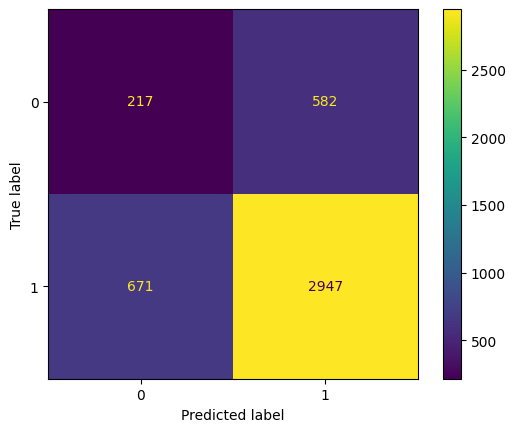

In [411]:
from sklearn.tree import DecisionTreeClassifier

random.seed(1234)
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)
compute_metrics(y_test, decisionTree.predict(X_test))

Accuracy: 0.8191079918496718
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       799
         1.0       0.82      1.00      0.90      3618

    accuracy                           0.82      4417
   macro avg       0.41      0.50      0.45      4417
weighted avg       0.67      0.82      0.74      4417



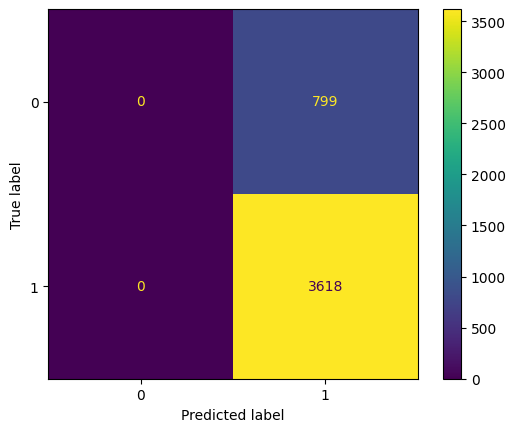

In [412]:
from sklearn.ensemble import RandomForestClassifier

random.seed(1234)
randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)
compute_metrics(y_test, randomForest.predict(X_test))

In [413]:
## SVM add CV and Tune
##DONT RUN UNLESS U HAVE LOTS OF TIME :)
#from sklearn.svm import SVC
#svm_model = SVC()

# Cross Validation
#cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
#print("Cross-validation scores:", cv_scores)
#print("Mean CV accuracy:", cv_scores.mean())

# Hyperparameter Tuning
#param_grid = {'C': [0.001, 0.01, 0.1], 'kernel': ['linear', 'rbf', 'poly']}
#grid_search = GridSearchCV(svm_model, param_grid, cv=5)
#grid_search.fit(X_train, y_train)
#best_params = grid_search.best_params_
#print("Best hyperparameters:", best_params)

# Tuned Model
#tuned_svm_model = grid_search.best_estimator_
#y_pred = tuned_svm_model.predict(X_test)

# Compute metrics
#compute_metrics(y_test, y_pred)

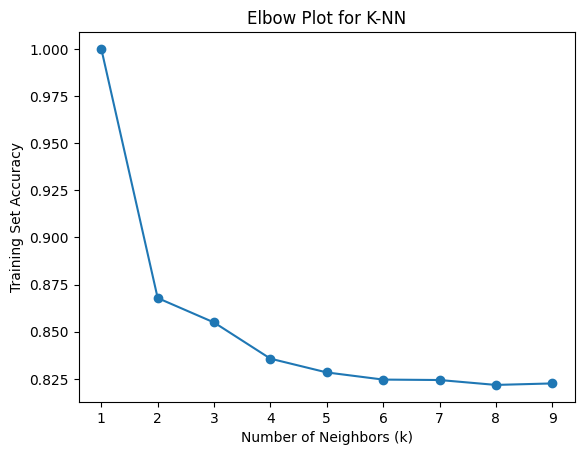

In [414]:
# K Selection
random.seed(1234)
k_values = np.arange(1, 10)
train_accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    train_accuracy = knn_model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

# Plot the elbow curve
plt.plot(k_values, train_accuracies, marker='o')
plt.title('Elbow Plot for K-NN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Training Set Accuracy')
plt.show()

2 seems to be the best without the extreme overfitting shown in k=1

Cross-validation scores: [0.76825127 0.7664874  0.77073309 0.76733654 0.76931786]
Mean CV accuracy: 0.7684252334405126
Accuracy: 0.7774507584333258
              precision    recall  f1-score   support

         0.0       0.25      0.11      0.15       799
         1.0       0.82      0.92      0.87      3618

    accuracy                           0.78      4417
   macro avg       0.54      0.52      0.51      4417
weighted avg       0.72      0.78      0.74      4417



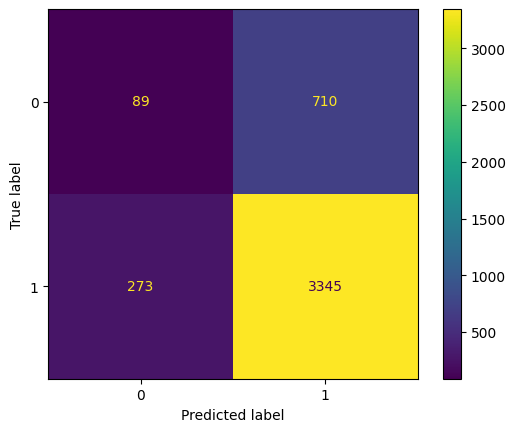

In [428]:
##K-NN
random.seed(1234)
selected_k = 3
knn_model = KNeighborsClassifier(n_neighbors=selected_k)

# Cross Validation
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

compute_metrics(y_test, y_pred)

Cross-validation scores (Euclidean, Uniform): [0.76825127 0.7664874  0.77073309 0.76733654 0.76931786]
Mean CV accuracy: 0.7684252334405126
Accuracy: 0.7774507584333258
              precision    recall  f1-score   support

         0.0       0.25      0.11      0.15       799
         1.0       0.82      0.92      0.87      3618

    accuracy                           0.78      4417
   macro avg       0.54      0.52      0.51      4417
weighted avg       0.72      0.78      0.74      4417


Cross-validation scores (Manhattan, Weighted): [0.78381437 0.76903481 0.76988395 0.77554486 0.77667705]
Mean CV accuracy: 0.7749910096589501
Accuracy: 0.7803939325333937
              precision    recall  f1-score   support

         0.0       0.26      0.12      0.16       799
         1.0       0.83      0.93      0.87      3618

    accuracy                           0.78      4417
   macro avg       0.54      0.52      0.52      4417
weighted avg       0.72      0.78      0.74      4417



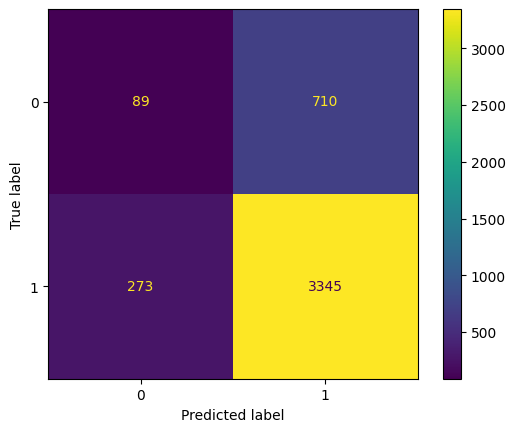

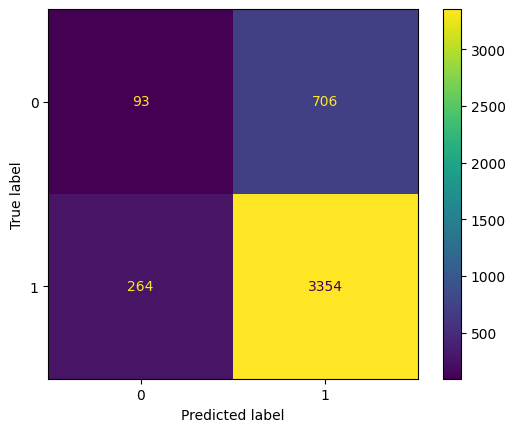

In [416]:
##K-NN Distances testing - not much of an impact. can delete.
random.seed(1234)
selected_k = 3

#Euclidean, Uniform
knn_model_euclidean_uniform = KNeighborsClassifier(n_neighbors=selected_k, metric='euclidean', weights='uniform')

# Cross Validation
cv_scores = cross_val_score(knn_model_euclidean_uniform, X_train, y_train, cv=5)
print("Cross-validation scores (Euclidean, Uniform):", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

knn_model_euclidean_uniform.fit(X_train, y_train)
y_pred = knn_model_euclidean_uniform.predict(X_test)
compute_metrics(y_test, y_pred)

# Manhattan, Distance
knn_model_manhattan_weighted = KNeighborsClassifier(n_neighbors=selected_k, metric='manhattan', weights='distance')

# Cross Validation
cv_scores = cross_val_score(knn_model_manhattan_weighted, X_train, y_train, cv=5)
print("\nCross-validation scores (Manhattan, Weighted):", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


knn_model_manhattan_weighted.fit(X_train, y_train)
y_pred = knn_model_manhattan_weighted.predict(X_test)
compute_metrics(y_test, y_pred)

Cross-validation scores: [0.81097906 0.80328333 0.79818851 0.79903765 0.80894424]
Mean CV accuracy: 0.8040865565207724
Accuracy: 0.8057505093955173
              precision    recall  f1-score   support

         0.0       0.30      0.05      0.09       799
         1.0       0.82      0.97      0.89      3618

    accuracy                           0.81      4417
   macro avg       0.56      0.51      0.49      4417
weighted avg       0.73      0.81      0.75      4417



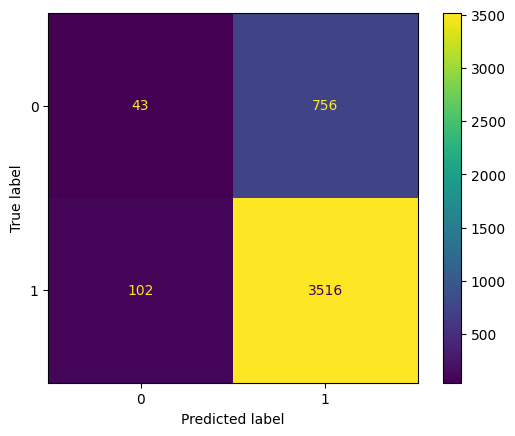

In [417]:
## Naive Bayes add CV and Tune
random.seed(1234)
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()  # Just Gaussian for now

# Cross Validation
cv_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Hyperparameter Tuning - Probably can remove for NB?
param_grid = {}
grid_search = GridSearchCV(naive_bayes_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

tuned_naive_bayes_model = grid_search.best_estimator_
y_pred = tuned_naive_bayes_model.predict(X_test)

# Compute metrics
compute_metrics(y_test, y_pred)

Cross-validation scores: [0.81663837 0.81658647 0.81686952 0.81686952 0.81686952]
Mean CV accuracy: 0.8167666777033615
Best hyperparameters: {'reg_alpha': 0.001, 'reg_lambda': 0.001}
Accuracy: 0.8191079918496718
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       799
         1.0       0.82      1.00      0.90      3618

    accuracy                           0.82      4417
   macro avg       0.41      0.50      0.45      4417
weighted avg       0.67      0.82      0.74      4417



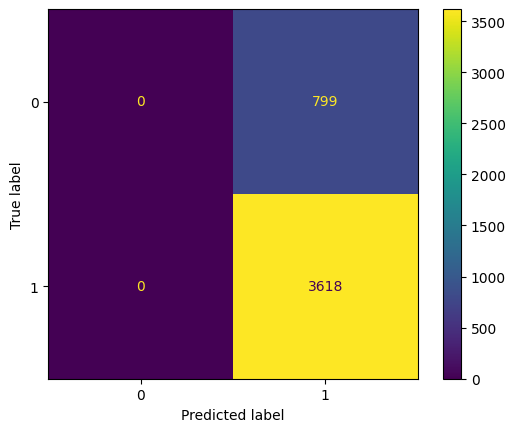

In [418]:
##XGBoost
random.seed(1234)
from xgboost import XGBClassifier
xgb_model = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1)

# Cross Validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Hyperparameter Tuning
param_grid = {'reg_alpha': [0.001, 0.01, 0.1], 'reg_lambda': [0.001, 0.01, 0.1]}
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

tuned_xgb_model = grid_search.best_estimator_
y_pred = tuned_xgb_model.predict(X_test)
compute_metrics(y_test, y_pred)

Multiclass Prediction?

In [419]:
train_3.head()

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Status,Resp_Rate_BreathsPerMin,...,Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs,Genetic_Disorder
0,2.0,1.0,0.0,1.0,0.0,4.760603,35.0,42.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.0,1.0,1.0,0.0,0.0,4.910669,35.0,23.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,41.0,22.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,12.0,1.0,0.0,1.0,0.0,4.705280,21.0,42.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11.0,1.0,0.0,2.0,1.0,4.720703,32.0,42.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [420]:
categories = {
    'Mitochondrial': [
        "Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy",
        "Mitochondrial genetic inheritance disorders - Leigh syndrome",
        "Mitochondrial genetic inheritance disorders - Mitochondrial myopathy"
    ],
    'Multifactorial': [
        "Multifactorial genetic inheritance disorders - Alzheimer's",
        "Multifactorial genetic inheritance disorders - Cancer",
        "Multifactorial genetic inheritance disorders - Diabetes"
    ],
    'Single-gene': [
        "Single-gene inheritance diseases - Cystic fibrosis",
        "Single-gene inheritance diseases - Hemochromatosis",
        "Single-gene inheritance diseases - Tay-Sachs"
    ]
}

In [425]:
def categorize_genetic(row):
    for category, columns in categories.items():
        if any(row[column] for column in columns):
            return category
    return 'None'

train_3['Genetic_Category'] = train_3.apply(categorize_genetic, axis=1)

In [426]:
train_3.head()

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Status,Resp_Rate_BreathsPerMin,...,Mitochondrial genetic inheritance disorders - Leigh syndrome,Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Multifactorial genetic inheritance disorders - Alzheimer's,Multifactorial genetic inheritance disorders - Cancer,Multifactorial genetic inheritance disorders - Diabetes,Single-gene inheritance diseases - Cystic fibrosis,Single-gene inheritance diseases - Hemochromatosis,Single-gene inheritance diseases - Tay-Sachs,Genetic_Disorder,Genetic_Category
0,2.0,1.0,0.0,1.0,0.0,4.760603,35.0,42.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Mitochondrial
1,4.0,1.0,1.0,0.0,0.0,4.910669,35.0,23.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
2,6.0,1.0,0.0,0.0,0.0,4.893297,41.0,22.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Multifactorial
3,12.0,1.0,0.0,1.0,0.0,4.705280,21.0,42.0,1.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Mitochondrial
4,11.0,1.0,0.0,2.0,1.0,4.720703,32.0,42.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Multifactorial


In [429]:
##Remove Target Variable - Genetic Disorder
X = train_3.iloc[:, 0:30]
y = train_3['Genetic_Category']

X.head()

,Patient_Age,Inherited_from_mother,Inherited_from_father,Maternal_Gene,Paternal_Gene,BCC_mcL,Mother_Age,Father_Age,Status,Resp_Rate_BreathsPerMin,...,History_Previous_Anomalies_Pregnancies,Previous_Abortion,Birth_Defects,WBC,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
0,2.0,1.0,0.0,1.0,0.0,4.760603,35.0,42.0,0.0,1.0,...,1.0,2.0,1.0,9.857562,0.0,1.0,1.0,1.0,1.0,1.0
1,4.0,1.0,1.0,0.0,0.0,4.910669,35.0,23.0,1.0,2.0,...,1.0,2.0,0.0,5.522560,3.0,1.0,1.0,1.0,1.0,0.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,41.0,22.0,0.0,1.0,...,1.0,4.0,2.0,7.477132,3.0,0.0,1.0,1.0,1.0,1.0
3,12.0,1.0,0.0,1.0,0.0,4.705280,21.0,42.0,1.0,2.0,...,1.0,1.0,2.0,7.919321,2.0,0.0,0.0,1.0,0.0,0.0
4,11.0,1.0,0.0,2.0,1.0,4.720703,32.0,42.0,0.0,2.0,...,0.0,4.0,0.0,4.098210,0.0,0.0,0.0,0.0,0.0,0.0


In [431]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

       Patient_Age  Inherited_from_mother  Inherited_from_father  \
8276           5.0                    1.0                    0.0   
5094          10.0                    1.0                    0.0   
9330          10.0                    1.0                    0.0   
172            7.0                    0.0                    0.0   
13835          3.0                    1.0                    1.0   
...            ...                    ...                    ...   
18258          3.0                    0.0                    1.0   
19880          7.0                    1.0                    0.0   
19583          5.0                    1.0                    0.0   
19685         13.0                    1.0                    1.0   
19278          5.0                    0.0                    2.0   

       Maternal_Gene  Paternal_Gene   BCC_mcL  Mother_Age  Father_Age  Status  \
8276             1.0            0.0  4.876887        44.0        31.0     0.0   
5094             0.0 

In [437]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

Cross-validation scores on Training set: [0.42257772 0.42619982 0.42904589 0.42421498 0.43025362]
Mean CV accuracy on Training set: 0.4264584071531997
Best hyperparameters on Training set: {'C': 0.1}
Accuracy: 0.4251207729468599
                precision    recall  f1-score   support

 Mitochondrial       0.43      0.95      0.59      1379
Multifactorial       0.39      0.24      0.30       281
          None       0.31      0.04      0.07       584
   Single-gene       0.32      0.01      0.01      1068

      accuracy                           0.43      3312
     macro avg       0.36      0.31      0.24      3312
  weighted avg       0.37      0.43      0.29      3312



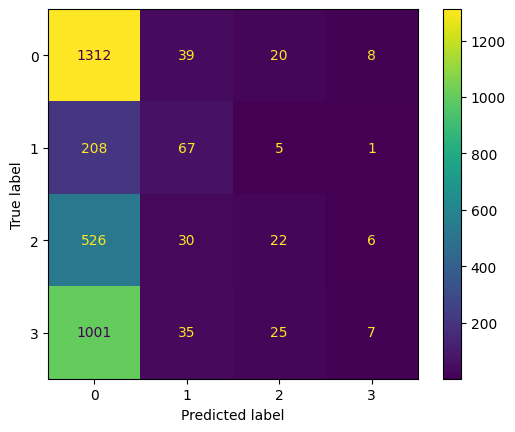

In [438]:
# LogReg add CV and Tune
random_seed = 1234
logRegression = LogisticRegression(random_state=random_seed)

# Cross Validation on Training set
cv_scores = cross_val_score(logRegression, x_train, y_train, cv=5)
print("Cross-validation scores on Training set:", cv_scores)
print("Mean CV accuracy on Training set:", cv_scores.mean())

# Hyperparameter Tuning on Training set
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(logRegression, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters on Training set:", best_params)


tuned_logRegression = grid_search.best_estimator_
y_val_pred = tuned_logRegression.predict(x_val)
compute_metrics(y_val, y_val_pred)

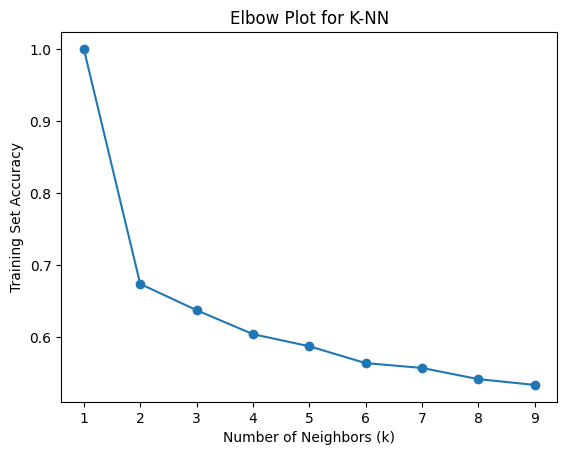

In [439]:
# K Selection
random.seed(1234)
k_values = np.arange(1, 10)
train_accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    train_accuracy = knn_model.score(x_train, y_train)
    train_accuracies.append(train_accuracy)

# Plot the elbow curve
plt.plot(k_values, train_accuracies, marker='o')
plt.title('Elbow Plot for K-NN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Training Set Accuracy')
plt.show()

Cross-validation scores: [0.382131   0.40175068 0.38798309 0.4076087  0.39915459]
Mean CV accuracy: 0.39572561100976833
Accuracy: 0.3911272068809416
                precision    recall  f1-score   support

 Mitochondrial       0.44      0.66      0.53       920
Multifactorial       0.24      0.17      0.20       187
          None       0.23      0.08      0.12       428
   Single-gene       0.35      0.28      0.31       674

      accuracy                           0.39      2209
     macro avg       0.31      0.30      0.29      2209
  weighted avg       0.35      0.39      0.35      2209

Accuracy: 0.39492753623188404
                precision    recall  f1-score   support

 Mitochondrial       0.44      0.66      0.53      1379
Multifactorial       0.26      0.18      0.21       281
          None       0.22      0.09      0.13       584
   Single-gene       0.37      0.28      0.32      1068

      accuracy                           0.39      3312
     macro avg       0.32      0

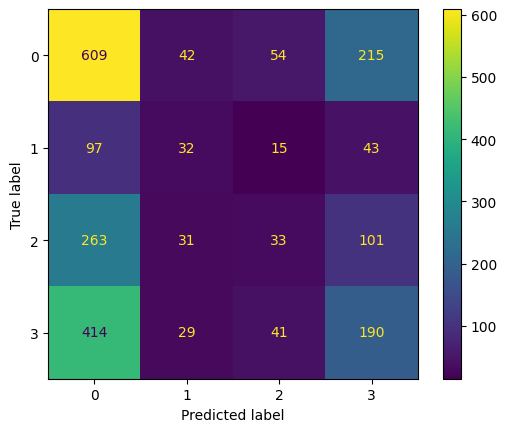

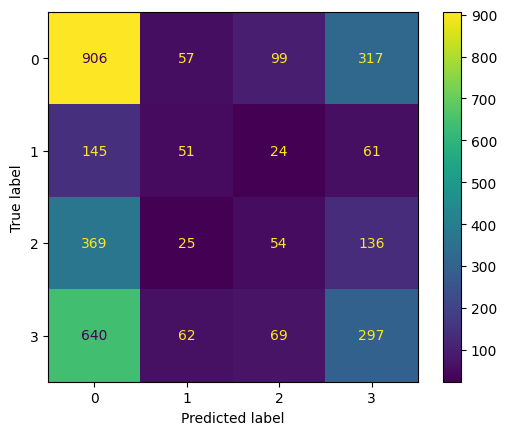

In [440]:
# K-NN
random.seed(1234)
selected_k = 3
knn_model = KNeighborsClassifier(n_neighbors=selected_k)

# Cross Validation
cv_scores = cross_val_score(knn_model, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

# Compute metrics on Test set
compute_metrics(y_test, y_pred)

# Predictions on Validation set
y_val_pred = knn_model.predict(x_val)

# Compute metrics on Validation set
compute_metrics(y_val, y_val_pred)

Cross-validation scores on Training set: [0.36854814 0.37096287 0.37711353 0.37983092 0.37681159]
Mean CV accuracy on Training set: 0.37465341117045864
Best hyperparameters on Training set: {'max_depth': 10, 'min_samples_split': 10}
Accuracy: 0.44680851063829785
                precision    recall  f1-score   support

 Mitochondrial       0.50      0.66      0.57       920
Multifactorial       0.37      0.21      0.27       187
          None       0.28      0.14      0.18       428
   Single-gene       0.41      0.42      0.42       674

      accuracy                           0.45      2209
     macro avg       0.39      0.36      0.36      2209
  weighted avg       0.42      0.45      0.42      2209

Accuracy: 0.4438405797101449
                precision    recall  f1-score   support

 Mitochondrial       0.51      0.68      0.58      1379
Multifactorial       0.33      0.20      0.24       281
          None       0.22      0.11      0.14       584
   Single-gene       0.41      0

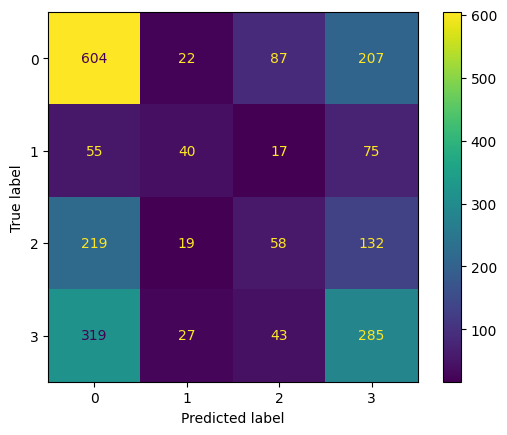

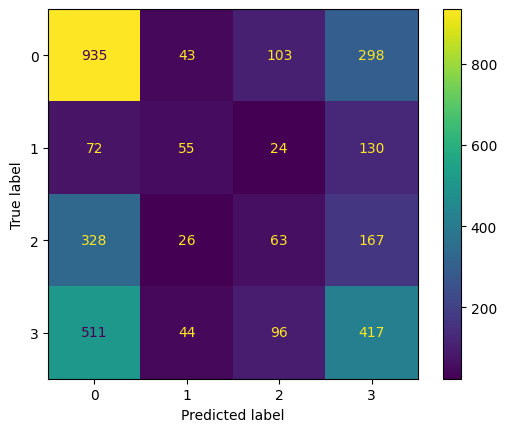

In [441]:
# Decision Tree
random.seed(1234)
decisionTree = DecisionTreeClassifier()

# Cross Validation
cv_scores = cross_val_score(decisionTree, x_train, y_train, cv=5)
print("Cross-validation scores on Training set:", cv_scores)
print("Mean CV accuracy on Training set:", cv_scores.mean())

# Hyperparameter Tuning
param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(decisionTree, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters on Training set:", best_params)

# Tuned Decision Tree
tuned_decisionTree = grid_search.best_estimator_

# Predictions on Test set
y_test_pred = tuned_decisionTree.predict(x_test)

# Compute metrics on Test set
compute_metrics(y_test, y_test_pred)

# Predictions on Validation set
y_val_pred = tuned_decisionTree.predict(x_val)

# Compute metrics on Validation set
compute_metrics(y_val, y_val_pred)

Cross-validation scores on Scaled Training set: [0.36190764 0.37458497 0.37137681 0.37771739 0.37952899]
Mean CV accuracy on Scaled Training set: 0.373023158659125
Best hyperparameters on Scaled Training set: {'max_depth': 10, 'min_samples_split': 5}
Accuracy: 0.44680851063829785
                precision    recall  f1-score   support

 Mitochondrial       0.50      0.66      0.57       920
Multifactorial       0.37      0.21      0.27       187
          None       0.28      0.14      0.18       428
   Single-gene       0.41      0.42      0.42       674

      accuracy                           0.45      2209
     macro avg       0.39      0.36      0.36      2209
  weighted avg       0.42      0.45      0.42      2209

Accuracy: 0.4438405797101449
                precision    recall  f1-score   support

 Mitochondrial       0.51      0.68      0.58      1379
Multifactorial       0.33      0.20      0.24       281
          None       0.22      0.11      0.14       584
   Single-gene

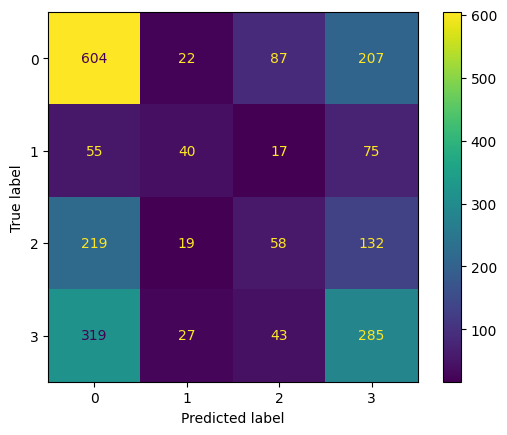

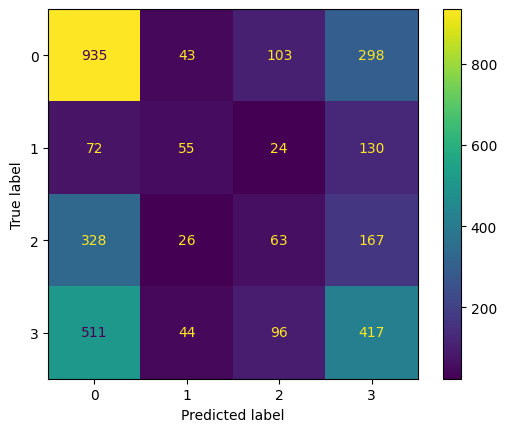

In [443]:
# Decision Tree
random.seed(1234)
decisionTree = DecisionTreeClassifier()

# Cross Validation on Scaled Training set
cv_scores = cross_val_score(decisionTree, x_train, y_train, cv=5)
print("Cross-validation scores on Scaled Training set:", cv_scores)
print("Mean CV accuracy on Scaled Training set:", cv_scores.mean())

# Hyperparameter Tuning on Scaled Training set
param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(decisionTree, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters on Scaled Training set:", best_params)


y_test_pred = tuned_decisionTree.predict(x_test)
compute_metrics(y_test, y_test_pred)
y_val_pred = tuned_decisionTree.predict(x_val)
compute_metrics(y_val, y_val_pred)


Cross-validation scores on Training set: [0.44400845 0.44249925 0.43085749 0.43448068 0.44202899]
Mean CV accuracy on Training set: 0.4387749693419716
Best hyperparameters on Training set: {'reg_alpha': 0.01, 'reg_lambda': 0.1}
Accuracy: 0.4277953825260299
              precision    recall  f1-score   support

           0       0.43      0.95      0.59       920
           1       0.29      0.09      0.14       187
           2       0.00      0.00      0.00       428
           3       0.46      0.08      0.14       674

    accuracy                           0.43      2209
   macro avg       0.30      0.28      0.22      2209
weighted avg       0.34      0.43      0.30      2209

Accuracy: 0.44233091787439616
              precision    recall  f1-score   support

           0       0.44      0.95      0.60      1379
           1       0.29      0.10      0.15       281
           2       1.00      0.01      0.01       584
           3       0.54      0.11      0.19      1068

    ac

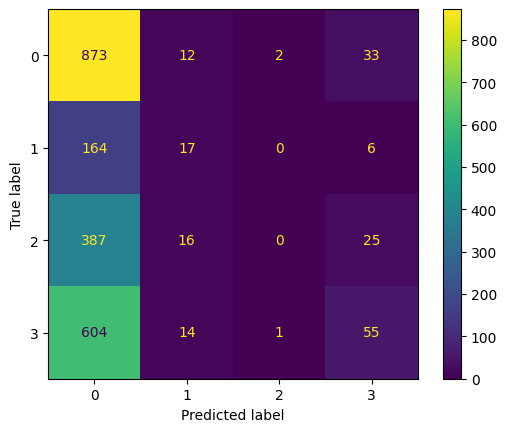

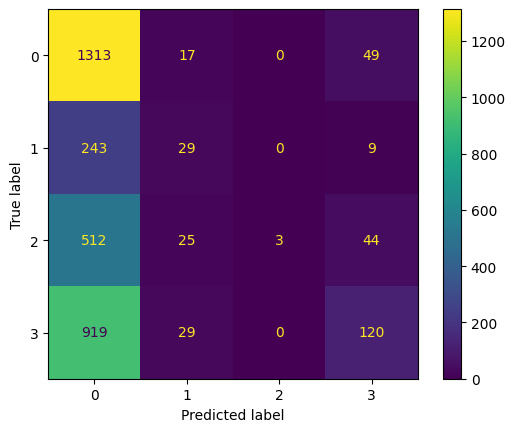

In [446]:
#XGBoost - If this doesn't do well I'll be stopping here for modeling for now (11/30/23)
# Assuming y_train, y_val, y_test are your categorical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# XGBoost
xgb_model = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1)

# Cross Validation on Training set
cv_scores = cross_val_score(xgb_model, x_train, y_train_encoded, cv=5)
print("Cross-validation scores on Training set:", cv_scores)
print("Mean CV accuracy on Training set:", cv_scores.mean())

# Hyperparameter Tuning on Training set
param_grid = {'reg_alpha': [0.001, 0.01, 0.1], 'reg_lambda': [0.001, 0.01, 0.1]}
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
grid_search.fit(x_train, y_train_encoded)
best_params = grid_search.best_params_
print("Best hyperparameters on Training set:", best_params)

# Tuned XGBoost on Training set
tuned_xgb_model = grid_search.best_estimator_

# Predictions on Scaled Test set
y_test_pred_encoded = tuned_xgb_model.predict(x_test)

# Compute metrics on Scaled Test set
compute_metrics(y_test_encoded, y_test_pred_encoded)

# Predictions on Scaled Validation set
y_val_pred_encoded = tuned_xgb_model.predict(x_val)

# Compute metrics on Scaled Validation set
compute_metrics(y_val_encoded, y_val_pred_encoded)